**Table of contents**<a id='toc0_'></a>    
- [DRACO - Milestone 2: Dataset exploration](#toc1_)    
  - [Importation of each datasets](#toc1_1_)    
    - [**CMU Movie corpus dataset**](#toc1_1_1_)    
    - [Character data](#toc1_1_2_)    
    - [CMU Movie data](#toc1_1_3_)    
    - [ **External dataset**](#toc1_1_4_)    
    - [Ethnicity data](#toc1_1_5_)    
    - [Kaggle dataset](#toc1_1_6_)    
  - [Preprocessing of the Data](#toc1_2_)    
    - [Cleaning the data](#toc1_2_1_)    
      - [Character data](#toc1_2_1_1_)    
      - [Movie data](#toc1_2_1_2_)    
        - [**CMU dataset**](#toc1_2_1_2_1_)    
        - [**Kaggle dataset**](#toc1_2_1_2_2_)    
      - [Merging the dataset](#toc1_2_1_4_)    
      - [Ethnicity data](#toc1_2_1_5_)    
      - [Grouping ethnicities in ethnic groups](#toc1_2_1_6_)    
    - [Merging dataframes](#toc1_2_2_)    
    - [Showing the feasibility of the project](#toc1_2_3_)    
        - [On the actor side](#toc1_2_3_1_1_)    
        - [On the movie side](#toc1_2_3_1_2_)    
  - [Plot summary analysis](#toc3_1_)
  - [Data Exploration](#toc1_3_)    
    - [Ethnicity Distribution](#toc1_3_1_)    
      - [Time-analysis time!](#toc1_3_1_1_)    
      - [Analysis based on gender](#toc1_3_1_2_)    
      - [Movie genres](#toc1_3_1_3_)    
      - [Movie revenue depending on the ethnicity proportion](#toc1_3_1_4_)    
      - [Role Analysis](#toc1_3_1_5_)    
    - [Diversity score (initial attempt)](#toc1_3_2_)  
  - [Machine learning analysis](#toc1_4_)  

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[DRACO - Milestone 2: Dataset exploration](#toc0_)


---

In [119]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colorbar import Colorbar
from matplotlib.colors import LogNorm
import seaborn as sns
%matplotlib inline
from scipy import stats
import codecs
import spacy
from spacy import displacy

In [120]:
DATA_FOLDER = './Data'

MOVIES_SUMMARIES_FOLDER = DATA_FOLDER + '/MovieSummaries'
CHARACTER_PATH = MOVIES_SUMMARIES_FOLDER + '/character.metadata.tsv'
MOVIE_PATH = MOVIES_SUMMARIES_FOLDER + '/movie.metadata.tsv'
NAME_PATH = MOVIES_SUMMARIES_FOLDER + '/name.clusters.txt'
PLOT_PATH = MOVIES_SUMMARIES_FOLDER + '/plot_summaries.txt'


ETHNICITY_PATH = DATA_FOLDER + '/ethnicities_data.tsv'
ETHNICITY_GROUP_PATH = DATA_FOLDER + '/ethnicity_group_data.tsv'

KAGGLE_PATH = DATA_FOLDER + '/Kaggle'
MOVIES_KAGGLE_PATH = KAGGLE_PATH + '/movies_metadata.csv'
RATING_PATH = KAGGLE_PATH + '/ratings.csv'


## <a id='toc1_1_'></a>[Importation of each datasets](#toc0_)

### <a id='toc1_1_1_'></a>[**CMU Movie corpus dataset**](#toc0_)

### <a id='toc1_1_2_'></a>[Character data](#toc0_)

In [121]:
characters_original = pd.read_csv(CHARACTER_PATH, sep='\t', header=None, 
    names = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie release date", "Character name", "Birth", 
    "Gender", "Height", "Ethnicity ID", "Name", "Age at movie release",
    "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"])

### <a id='toc1_1_3_'></a>[CMU Movie data](#toc0_)

In [122]:
movies_CMU = pd.read_csv(MOVIE_PATH, sep='\t', header=None, 
    names = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie name","Movie release date", "Box office revenue","Movie runtime","Movie language","Movie countries","Movie genres" ])

### <a id='toc1_1_4_'></a>[ **External dataset**](#toc0_)

### <a id='toc1_1_5_'></a>[Ethnicity data](#toc0_)

These data were created using the files `Ethnicity_extraction.iypnb` and `Ethnicity_grouped.iypnb`

In [123]:
ethnicities_original = pd.read_csv(ETHNICITY_PATH, sep='\t',  
                               header=0, names=["Ethnicity ID", "Ethnicity"])

ethnic_group_original = pd.read_csv(ETHNICITY_GROUP_PATH, sep='\t')

For more information refer to section [Ethnicity data](#toc1_2_1_5_)

### <a id='toc1_1_6_'></a>[Kaggle dataset](#toc0_)

To expand our dataset with additional information, we decided to include the full MovieLens Dataset found on [Kaggle](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data). This dataset contains the following files:
- **movies_metadata.csv:** The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

- **keywords.csv:** Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

- **credits.csv:** Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

- **links.csv:** The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

- **links_small.csv:** Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.

- **ratings_small.csv:** The subset of 100,000 ratings from 700 users on 9,000 movies.

In [124]:
movies_kaggle = pd.read_csv(MOVIES_KAGGLE_PATH, header = 0,
    names = ["Adult", "Belongs to collection", "Budget", "Genres", "Homepage", 
    "Kaggle_ID", "IMBD_ID", "Language", "Orignal title", "Plot summary",
    "Popularity", "Poster path", "Production companies","Production countries",
    "Movie release date","Box office revenue","Movie runtime","Spoken language","status",
    "Tagline", "Movie name", "Video", "Vote average", "Vote count"],low_memory=False)

## <a id='toc1_2_'></a>[Preprocessing of the Data](#toc0_)

### <a id='toc1_2_1_'></a>[Cleaning the data](#toc0_)

#### <a id='toc1_2_1_1_'></a>[Character data](#toc0_)

Let's see what the movie dataset looks like.

In [125]:
characters_original.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Birth,Gender,Height,Ethnicity ID,Name,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [126]:
characters_original.describe()

,Wikipedia Movie ID,Height,Age at movie release
count,4.506690e+05,154824.000000,292556.000000
mean,1.396975e+07,1.788893,37.788523
std,1.079662e+07,4.379940,20.587870
min,3.300000e+02,0.610000,-7896.000000
25%,3.759292e+06,1.676400,28.000000
50%,1.189065e+07,1.750000,36.000000
75%,2.366501e+07,1.830000,47.000000
max,3.750192e+07,510.000000,103.000000


As we can see there are issues in the dataset. 
- First some ethnicites as well as gender are not specified.
- Second we can see that the age at movie release spans from -7896 to 103 years.

For our analysis we have decided to discard all characters that don't have a specified ethnicity as well as a specified gender. Moreover, only strictly positive ages will be taken into account. 

The height and name of the actor are not relevant in our analysis. In addition, the column `Freebase Movie ID` is redundant with `Wikipedia Movie ID`. Therefore, we drop these 3 columns.

In [127]:
characters = characters_original.copy()
characters = characters.drop(['Freebase Movie ID','Height','Name'], axis=1)

In [128]:
characters = characters[characters['Ethnicity ID'].notna()]
characters = characters[characters['Gender'].notna()]
characters = characters[characters['Age at movie release'] > 0]

In [129]:
characters.head()

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
1,975900,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,/m/044038p,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
5,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
11,975900,2001-08-24,Tres,1959-03-09,M,/m/064b9n,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb
27,3196793,2000-02-16,NaN,1937-11-10,M,/m/0x67,62.0,/m/0lr37dy,NaN,/m/01lntp


#### <a id='toc1_2_1_2_'></a>[Movie data](#toc0_)

##### <a id='toc1_2_1_2_1_'></a>[**CMU dataset**](#toc0_)

Let's see what the CMU movie dataset looks like.

In [130]:
movies_CMU = movies_CMU.drop(['Freebase Movie ID'], axis=1)

In [131]:
movies_CMU.head()

,Wikipedia Movie ID,Movie name,Movie release date,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


All columns of this dataset are relevant for the following justifications:
- Wikipedia Movie ID: used to get a unique identifier for each movie and to merge with the character dataset
- Movie name: used to merge other external movie dataset with MCU movie dataset
- Movie release date: used to merge the other datasets and to carry out temporal analysis
- Box office revenue: useful for the data analysis
- Movie runtime: useful for the data analysis
- Movie language: (could be) useful for the data analysis
- Movie countries: useful for the data analysis
- Movie genres: useful for the data analysis


Then let's do preliminary pre-processing steps related to the dataset (the remaining pre-processing will be done later after merging the datasets). We first need to correct the format of columns which contains dictionaries, i.e. `Movie language`, `Movie countries` and `Movie genres`. In our case, it would be much more convenient to have lists instead. Let's process it accordingly.

In [132]:
movies_CMU["Movie countries"] = movies_CMU["Movie countries"].apply(lambda x: list(json.loads(x).values()) if len(json.loads(x).values()) > 0 else 'NaN')
movies_CMU["Movie genres"] = movies_CMU["Movie genres"].apply(lambda x: list(json.loads(x).values()) if len(json.loads(x).values()) > 0 else 'NaN')
movies_CMU["Movie language"] = movies_CMU["Movie language"].apply(lambda x: list(json.loads(x).values()) if len(json.loads(x).values()) > 0 else 'NaN')

As the dataset was released in 2013, the data from that year is not complete and thus should be removed. To simplify this step we can add a category for the year of release in addition to the date of release.

In [133]:
#Errors = 'coerce' will force the values that are outside the bound to be NaT
movies_CMU["Movie release year"] = pd.to_datetime(movies_CMU["Movie release date"],format='mixed',errors = 'coerce').dt.year
#Remove the NaN and NaT values
movies_CMU = movies_CMU[movies_CMU["Movie release year"].notna()]
#Express all years of realese as int.
movies_CMU["Movie release year"] = movies_CMU["Movie release year"].astype("int")

#Finaly let's remove the movies released in 2013
movies_CMU = movies_CMU[movies_CMU['Movie release year'] < 2013]


We want to verify that no movies are duplicated, and if they are we want to keep the ones that have the correct information. We show here the movie titles that appear multiple times. The example of Indiana Jones and the Last Crusade is shown here, the choice of the kept movies is done manually.

In [134]:
columns_to_compare = ['Movie name', 'Movie release date']
movie_duplicates = movies_CMU.duplicated(subset=columns_to_compare, keep=False)
equal_rows_df = movies_CMU[movie_duplicates]
names=equal_rows_df['Movie name'].unique()
print(f"Duplicate movies : \n{names}")
display(equal_rows_df[equal_rows_df['Movie name']== 'Indiana Jones and the Last Crusade'])

Duplicate movies : 
['Landspeed: CKY' 'Apocalypse' 'Buck Rogers in the 25th Century'
 'Indiana Jones and the Last Crusade' 'Fist of the North Star'
 'The Other Side' 'Three Sisters' 'Secrets of Nature' 'Treasure Island'
 'Little Big Horn' 'Jeepers Creepers' 'The Living and the Dead'
 'Invincible' 'Moscow Strikes Back' 'Gossip' 'The Ambassador' 'Camille'
 'Orange' 'Milan' 'Armour of God II: Operation Condor' 'Going Back'
 'Brahmachari' 'The Job' 'Endgame' 'Facing the Music' 'Outpost' 'Exodus'
 'Fragile' 'Yours, Mine and Ours' 'Oliver Twist' 'Durango' 'Sangam' 'A'
 'The Duke' 'Intermezzo' 'Perpetual Wake']


,Wikipedia Movie ID,Movie name,Movie release date,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres,Movie release year
4856,3184269,Indiana Jones and the Last Crusade,1989-05-24,NaN,127.0,"[Greek Language, German Language, English Lang...",[United States of America],"[Costume Adventure, Action, Adventure Comedy, ...",1989
49203,51888,Indiana Jones and the Last Crusade,1989-05-24,474171806.0,127.0,NaN,NaN,[Adventure],1989


When the movie metadata is very similar, we also check the character metadata to differentiate. If none of the possibilities have characters, we can drop all of them. Of course, if the possibilities shown are indeed different, we keep all of them.

Below we show the characters associated to two duplicate movies (Indiana Jones and the Last Crusade). Note the different Wikipedia Movie ID but the attributes are very similar.

In [135]:
display(characters[characters['Wikipedia Movie ID']==3184269])
display(characters[characters['Wikipedia Movie ID']==51888])

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
2419,3184269,1989-05-24,Indiana Jones,1942-07-13,M,/m/01qhm_,46.0,/m/0jzx7x,/m/03ttl,/m/0c0k1
2420,3184269,1989-05-24,"Henry Jones, Sr.",1930-08-25,M,/m/03lmx1,58.0,/m/0jzx81,/m/0bss74,/m/06mr6
2421,3184269,1989-05-24,Sallah,1944-05-05,M,/m/06gbnc,45.0,/m/0jzx86,/m/0g2byj,/m/01846t
2425,3184269,1989-05-24,General Vogel,1943-11-07,M,/m/02w7gg,45.0,/m/03jqxj0,/m/0h5sxnp,/m/0c6mv6
2426,3184269,1989-05-24,Gestapo,1937-05-19,M,/m/0g96wd,52.0,/m/03mk_ty,/m/0hgyvv2,/m/036m4c
2427,3184269,1989-05-24,Indiana Jones,1970-08-23,M,/m/041rx,18.0,/m/0448qqk,/m/03ttl,/m/015076
2431,3184269,1989-05-24,Sultan,1952-08-07,M,/m/041rx,36.0,/m/0h2qcg5,/m/0h2qcg8,/m/01nxwv


,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
260297,51888,1989-05-24,NaN,1970-08-23,M,/m/041rx,18.0,/m/0k3fynx,NaN,/m/015076
260298,51888,1989-05-24,NaN,1944-05-05,M,/m/06gbnc,45.0,/m/0k3fmhl,NaN,/m/01846t
260301,51888,1989-05-24,NaN,1930-08-25,M,/m/03lmx1,58.0,/m/0k3g4_p,NaN,/m/06mr6
260302,51888,1989-05-24,NaN,1942-07-13,M,/m/01qhm_,46.0,/m/0k3g5x9,NaN,/m/0c0k1


We notice that the second ID doesn't give correct information, this is the one that we will let go of. However, it also contains information that is missing from the first ID. We verify the veracity of the information and transfer it to the other row if correct, in our case this only happens once.

In [136]:
movies_CMU[movies_CMU['Wikipedia Movie ID'].isin([51888,3184269])]=movies_CMU[movies_CMU['Wikipedia Movie ID'].isin([51888,3184269])].bfill()

In [137]:
#we make a list of the movie IDs to drop
ids_to_drop=[51888,8721073,30755379,22609983,35075250,20774714, 24904539,32276034,14592879,33041728,34014517,11805916,9562585,28683974,6678894,5710355,6674887,18519065,1407235,
             31214305,9141521,20306762,30367860,15391331]
movies_CMU=movies_CMU[~movies_CMU['Wikipedia Movie ID'].isin(ids_to_drop)]

Let's verify that the process of merging duplicates happened correctly

In [138]:
display(movies_CMU[movies_CMU['Movie name']== 'Indiana Jones and the Last Crusade'])

,Wikipedia Movie ID,Movie name,Movie release date,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres,Movie release year
4856,3184269,Indiana Jones and the Last Crusade,1989-05-24,474171806.0,127.0,"[Greek Language, German Language, English Lang...",[United States of America],"[Costume Adventure, Action, Adventure Comedy, ...",1989


Everything looks correct, we kept the version of the movie with the more character information (`Wikipedia Movie ID` = 3184269) and added it the box office revenue from the other version.

Let's have a look at our MCU movie dataset after the pre-processing step.

In [139]:
movies_CMU.head()

,Wikipedia Movie ID,Movie name,Movie release date,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres,Movie release year
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000
2,28463795,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988
3,9363483,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987
4,261236,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983


#### <a id='#toc1_2_1_2_2_'></a>[**Kaggle dataset**](#toc0_)

As explained before, to expand our dataset with more information, we are going to use the Kaggle dataset. Let's then see what kind of information could be relevant for our project.

In [140]:
movies_kaggle.head()

,Adult,Belongs to collection,Budget,Genres,Homepage,Kaggle_ID,IMBD_ID,Language,Orignal title,Plot summary,...,Movie release date,Box office revenue,Movie runtime,Spoken language,status,Tagline,Movie name,Video,Vote average,Vote count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Among these different columns, the informations relevant to analyze the success depending on the cast ethnicity of a movie are : `Budget`, `Plot summary`, `Movie release date`, `Box office revenue`, `Movie runtime`, `Movie name`, `Vote average` and `Vote count`.
Thus let's drop of the other unnecessary columns.

In [141]:
movies_kaggle = movies_kaggle.drop(["Adult", "Belongs to collection",  "Genres", "Homepage", 
                                    "Kaggle_ID", "IMBD_ID", "Language", "Orignal title", 
                                    "Popularity", "Poster path", "Production companies","Production countries",
                                    "Spoken language","status", "Tagline", "Video"],axis=1)

As for the CMU, let's also change the movie release date format by adding the year of release instead.

In [142]:
#Errors = 'coerce' will force the values that are outside the bound to be NaT
movies_kaggle["Movie release year"] = pd.to_datetime(movies_kaggle["Movie release date"],format='mixed',errors = 'coerce').dt.year

#Remove the NaN and NaT values
movies_kaggle= movies_kaggle.dropna(subset=["Movie release year"])

#Express all years of realese as int.
movies_kaggle["Movie release year"] = movies_kaggle["Movie release year"].astype("int")

We also have to take care of the duplicate movies for this dataset

In [143]:
columns_to_compare = ['Movie name', 'Movie release date']
movie_duplicates = movies_kaggle.duplicated(subset=columns_to_compare, keep=False)
equal_rows_df = movies_kaggle[movie_duplicates]
names=equal_rows_df['Movie name'].unique()
print(f"Duplicate movies : \n{names}")

Duplicate movies : 
['The Promise' 'Wife' 'A Farewell to Arms' 'A Place at the Table'
 'Pokémon: Spell of the Unknown' 'Camille Claudel 1915' 'Clockstoppers'
 'Pokémon 4Ever: Celebi - Voice of the Forest' 'Rich and Famous'
 'Confessions of a Dangerous Mind' 'Le Samouraï' 'The Warrior'
 'The Phantom of the Opera' 'Bubble' 'Black Gold' 'Offside'
 'Why We Fight: Divide and Conquer' 'Blackout'
 'Nana, the True Key of Pleasure' 'Seven Years Bad Luck'
 'Days of Darkness' 'Deal' 'King Lear' 'The Viking' 'Brotherhood'
 'The Tempest' 'The Congress' 'Force Majeure' 'Cemetery of Splendour']


In [144]:
movies_kaggle[movies_kaggle['Movie name'] == 'Seven Years Bad Luck']

,Budget,Plot summary,Movie release date,Box office revenue,Movie runtime,Movie name,Vote average,Vote count,Movie release year
13946,0,"After breaking a mirror in his home, superstit...",1921-02-06,0.0,62.0,Seven Years Bad Luck,5.6,4.0,1921
40276,0,"After breaking a mirror in his home, superstit...",1921-02-06,0.0,62.0,Seven Years Bad Luck,5.6,4.0,1921


These 2 duplicates are exactly the same and therefore we can drop the duplicate without being afraid of loosing information.
Plus after manual verification, every duplicates of the Kaggle dataset are exactly the same and will also be removed.

In [145]:
movies_kaggle = movies_kaggle.drop_duplicates(subset='Movie name')

In [146]:
movies_kaggle.head()

,Budget,Plot summary,Movie release date,Box office revenue,Movie runtime,Movie name,Vote average,Vote count,Movie release year
0,30000000,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,1995
1,65000000,When siblings Judy and Peter discover an encha...,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,1995
2,0,A family wedding reignites the ancient feud be...,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,1995
3,16000000,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995
4,0,Just when George Banks has recovered from his ...,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,1995


#### <a id='toc1_2_1_4_'></a>[Merging the dataset](#toc0_)

For better efficiency, we're going to merge the 2 datasets together and clean them after this step.
Before merging let's have a general idea of the size of each datasets and the number of values that can be used directly (not Nan values). This is important to know how much data we could lose if we decided to keep informations present in only one dataset.

In [147]:
#Print the datasets size
print("Length of the MCU dataset : " ,movies_CMU.shape[0])
print("Length of the Kaggle dataset : " ,movies_kaggle.shape[0])

Length of the MCU dataset :  74626
Length of the Kaggle dataset :  42196


In [148]:
#Print the sum of not Nan values 
print(f"Sum of not Nan values in the MCU dataset:\n-------\n{movies_CMU.notna().sum()}")
print(f"===============================")
print(f"Sum of not Nan values in the Kaggle dataset :\n-------\n{movies_kaggle.notna().sum()}")

Sum of not Nan values in the MCU dataset:
-------
Wikipedia Movie ID    74626
Movie name            74626
Movie release date    74626
Box office revenue     8327
Movie runtime         58591
Movie language        74626
Movie countries       74626
Movie genres          74626
Movie release year    74626
dtype: int64
Sum of not Nan values in the Kaggle dataset :
-------
Budget                42196
Plot summary          41294
Movie release date    42196
Box office revenue    42196
Movie runtime         41957
Movie name            42196
Vote average          42196
Vote count            42196
Movie release year    42196
dtype: int64


Even though the MCU dataset has higher number of missing values, it also has the higher number of values. Therefore it should be used for merging using the left join. However the left join should be only done on the `Movie name` and `Movie release date` to let the possibility of using the values from the Kaggle dataset to complete the `Nan` values of the CMU dataset. We choose the 2 columns to ensure of the identity of the movie, as we can have multiple movies with the same name.
Concerning the general smaller size of the Kaggle dataset, we should also keep in mind that if we want to analyze the vote scores of the merged dataset, we're going to loss half or more of the MCU dataset. But a deeper feasibility analysis will be perform after the data cleaning.

In [149]:
#Let's merge the data
movies = movies_CMU.copy().merge(movies_kaggle,on=['Movie name','Movie release date'],how='left')
#Vizualise the new mereged dataset
movies.head()

,Wikipedia Movie ID,Movie name,Movie release date,Box office revenue_x,Movie runtime_x,Movie language,Movie countries,Movie genres,Movie release year_x,Budget,Plot summary,Box office revenue_y,Movie runtime_y,Vote average,Vote count,Movie release year_y
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001,28000000,Melanie Ballard (Natasha Henstridge) is a hard...,14010832.0,98.0,4.8,299.0,2001.0
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9363483,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,261236,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On the merged dataset, we have 2 columns for the `Box office revenue` and the `Movie runtime`. As the Kaggle dataset contains more information concerning the box office than the MCU dataset, we should used its information to complete the missing values of the MCU one. Same thing for the `Movie runtime`. <br>
Plus we should only keep the year of release.

In [150]:
#Let's replace the Nan values of the MCU dataset by the one of the Kaggel dataset
movies['Box office revenue'] = movies['Box office revenue_x'].fillna(movies['Box office revenue_y'])
movies['Movie runtime'] = movies['Movie runtime_x'].fillna(movies['Movie runtime_y'])
movies['Movie release year']=movies['Movie release year_x'].fillna(movies['Movie release year_y'])

#Let's drop the Box office revenue, movie runtime and also the date of release
movies = movies.drop(['Box office revenue_x','Box office revenue_y','Movie runtime_x','Movie runtime_y', 'Movie release year_x', 'Movie release year_y'],axis=1)

After this, let's see the change in available data on the merged dataset.

In [151]:
#Print the sum of not Nan values 
print(f"Sum of not Nan values in the CMU dataset:\n-------\n{movies_CMU.notna().sum()}")
print(f"===================================")
print(f"Sum of not Nan values of the merged dataset:\n-------\n{movies.notna().sum()}")

Sum of not Nan values in the CMU dataset:
-------
Wikipedia Movie ID    74626
Movie name            74626
Movie release date    74626
Box office revenue     8327
Movie runtime         58591
Movie language        74626
Movie countries       74626
Movie genres          74626
Movie release year    74626
dtype: int64
Sum of not Nan values of the merged dataset:
-------
Wikipedia Movie ID    74626
Movie name            74626
Movie release date    74626
Movie language        74626
Movie countries       74626
Movie genres          74626
Budget                 7869
Plot summary           7845
Vote average           7869
Vote count             7869
Box office revenue    13064
Movie runtime         58767
Movie release year    74626
dtype: int64


Thanks to the Kaggle dataset we went from 8327 values for the box office revenue to 13064.

In [152]:
movies.describe()

,Wikipedia Movie ID,Vote average,Vote count,Box office revenue,Movie runtime,Movie release year
count,7.462600e+04,7869.000000,7869.000000,1.306400e+04,5.876700e+04,74626.000000
mean,1.700172e+07,5.848710,146.972042,3.154148e+07,1.124533e+02,1977.397489
std,1.102403e+07,1.477202,529.044240,9.324465e+07,4.452268e+03,28.867972
min,3.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,1888.000000
25%,6.795092e+06,5.300000,6.000000,0.000000e+00,8.100000e+01,1956.000000
50%,1.695957e+07,6.100000,18.000000,2.136522e+06,9.300000e+01,1985.000000
75%,2.662501e+07,6.700000,78.000000,2.003637e+07,1.070000e+02,2003.000000
max,3.750192e+07,10.000000,12269.000000,2.782275e+09,1.079281e+06,2012.000000


To always have the maximal number of available values, we're going to remove the `Nan` values only when the analysis we want to perfom needs it. 
However to perform an analysis which is relevant to our subject, there are some pre-processing steps to do. We want to focus on movies that could potentially be found on TV or cinema and where real actors are playing in. <br> It means that we should keep movies of duration greater than 10min but smaller than smaller than 4 hours (240min). <br>


In [153]:
#Let's remove the movies of the wrong direction
movies = movies[movies['Movie runtime'] >= 10]
movies = movies[movies['Movie runtime'] < 240]

Plus we should also pay attention to the movie of the Animation field as the actors that have played inside are rather voice actors than actors. 

In [154]:
# First let's see all the unique genres, to discard the animation ones:
unique_genres = set()
movies['Movie genres'].apply(lambda x: unique_genres.update(x))
print(unique_genres)

{'Satire', 'Z movie', 'Disaster', 'Libraries and librarians', 'Space opera', 'B-movie', 'Crime', 'Illnesses & Disabilities', 'Marriage Drama', 'Hardcore pornography', 'Addiction Drama', 'Supernatural', 'Tollywood', 'World History', 'Stop motion', 'Fantasy Adventure', 'Black-and-white', 'The Netherlands in World War II', 'Chinese Movies', 'Apocalyptic and post-apocalyptic fiction', 'Linguistics', 'Sword and sorcery films', 'Erotica', 'Cold War', 'Period piece', 'Remake', 'Escape Film', 'Animals', 'Plague', 'Computer Animation', 'Hagiography', 'Avant-garde', 'Action/Adventure', 'Animated cartoon', 'Stoner film', 'Absurdism', 'Action Comedy', 'Action', 'Religious Film', 'Comedy-drama', 'Costume Horror', 'Computers', 'Natural disaster', 'Boxing', 'Goat gland', 'Gulf War', 'Teen', "Children's Fantasy", 'Psychological horror', 'Cavalry Film', 'Archives and records', 'Clay animation', 'Film adaptation', 'Propaganda film', 'Slice of life story', 'Time travel', 'Gay pornography', 'Adventure', '

In [155]:
values_to_find = ['Anime', 'Animation', 'Computer Animation', 'Clay animation', 'Animated cartoon','Stop motion']
movies = movies[movies['Movie genres'].apply(lambda x: not(any(value in x for value in values_to_find)))]

Let' see how is the movies dataset after pre-processing it.

In [156]:
movies.head()

,Wikipedia Movie ID,Movie name,Movie release date,Movie language,Movie countries,Movie genres,Budget,Plot summary,Vote average,Vote count,Box office revenue,Movie runtime,Movie release year
0,975900,Ghosts of Mars,2001-08-24,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN,NaN,NaN,95.0,2000
2,28463795,Brun bitter,1988,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",NaN,NaN,NaN,NaN,NaN,83.0,1988
3,9363483,White Of The Eye,1987,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",NaN,NaN,NaN,NaN,NaN,110.0,1987
4,261236,A Woman in Flames,1983,[German Language],[Germany],[Drama],NaN,NaN,NaN,NaN,NaN,106.0,1983


#### <a id='toc1_2_1_5_'></a>[Ethnicity data](#toc0_)

Let's see what the ethnicity dataset looks like.

In [157]:
ethnicities_original.head()

,Ethnicity ID,Ethnicity
0,/m/044038p,NaN
1,/m/0x67,African Americans
2,/m/064b9n,Omaha people
3,/m/041rx,Jewish people
4,/m/033tf_,Irish Americans


Here again we have NaN values for some ethnicities, we can drop them now.

In [158]:
ethnicities = ethnicities_original.copy()
ethnicities = ethnicities[ethnicities['Ethnicity'].notna()]

In [159]:
ethnicities.head()

,Ethnicity ID,Ethnicity
1,/m/0x67,African Americans
2,/m/064b9n,Omaha people
3,/m/041rx,Jewish people
4,/m/033tf_,Irish Americans
5,/m/04gfy7,Indian Americans


#### <a id='toc1_2_1_6_'></a>[Grouping ethnicities in ethnic groups](#toc0_)

In [160]:
nb_ethnicities = len(np.unique(ethnicities['Ethnicity']))
print('Number of ethncities:',nb_ethnicities)

Number of ethncities: 431


As we can see we have a lot of different ethnicities in the dataframe. For our analysis it could be interesting to group them according to [UK's list of ethnic groups ](https://www.ethnicity-facts-figures.service.gov.uk/style-guide/ethnic-groups). This list groups ethnicity in five main groups:
- White
- Black, Caribbean or African
- Asian
- Mixed or multiple ethnic groups
- Other ethnic group

Due to inconsistencies in ethnicity names, we decided to classify them manually. The ethnicities present in each group can be found in the `Ethnicity_grouping.ipynb` file.

Nevertheless to have clusters of similar size, we have decided to combine `Asian` with `Other ethnic group` to a larger group called `Asian, Middle East and Tribes`. Thus, the four resulting groups are:
- White
- Black, Caribbean or African
- Asian, Middle East and Tribes
- Mixed or multiple ethnic groups

In [161]:
ethnic_group = ethnic_group_original.copy()
ethnic_group.head()

,Ethnicity,Ethnic Group
0,Aceh,"Asian, Middle East and Tribes"
1,Afghans in India,"Asian, Middle East and Tribes"
2,Agrawal,"Asian, Middle East and Tribes"
3,Asian people,"Asian, Middle East and Tribes"
4,Bengali Brahmins,"Asian, Middle East and Tribes"


In [162]:
ethnic_group_palette = {
    'White': (0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
    'Asian, Middle East and Tribes': (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
    'Mixed or multiple ethnic groups': (0.41568627450980394, 0.8, 0.39215686274509803),
    'Black, Caribbean or African': (0.8392156862745098, 0.37254901960784315, 0.37254901960784315)
}

### <a id='toc1_2_2_'></a>[Merging dataframes](#toc0_)

Now that all the datasets are cleaned, we can merge them into one big dataframe.

Let's first merge the character dataset with the list of ethnicities, so we can add their ethinicity to the dataset

In [163]:
characters_extended = characters.copy().merge(ethnicities, how='inner', on='Ethnicity ID')
characters_extended.head()

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Ethnicity
0,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,African Americans
1,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,African Americans
2,3196793,2000-02-16,NaN,1937-11-10,M,/m/0x67,62.0,/m/0lr37dy,NaN,/m/01lntp,African Americans
3,156558,2001-06-27,Yvette,1970-09-11,F,/m/0x67,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,African Americans
4,156558,2001-06-27,Jody,1978-12-30,M,/m/0x67,22.0,/m/0jtx5h,/m/03jnxf4,/m/01l1b90,African Americans


Let's merge the characters with the list of ethnic groups to obtain the ethnic group of each actor

In [164]:
characters_extended = characters_extended.merge(ethnic_group, how='inner', on='Ethnicity')
characters_extended.head()

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Ethnicity,Ethnic Group
0,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,African Americans,"Black, Caribbean or African"
1,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,African Americans,"Black, Caribbean or African"
2,3196793,2000-02-16,NaN,1937-11-10,M,/m/0x67,62.0,/m/0lr37dy,NaN,/m/01lntp,African Americans,"Black, Caribbean or African"
3,156558,2001-06-27,Yvette,1970-09-11,F,/m/0x67,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,African Americans,"Black, Caribbean or African"
4,156558,2001-06-27,Jody,1978-12-30,M,/m/0x67,22.0,/m/0jtx5h,/m/03jnxf4,/m/01l1b90,African Americans,"Black, Caribbean or African"


Then let's merge the character dataset with the movie dataset to link the actors with the movies they have played


In [165]:
characters_movies = characters_extended.copy().merge(movies, how='inner', on=['Wikipedia Movie ID','Movie release date'])
characters_movies.head()

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,...,Movie language,Movie countries,Movie genres,Budget,Plot summary,Vote average,Vote count,Box office revenue,Movie runtime,Movie release year
0,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,...,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001
1,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,...,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001
2,975900,2001-08-24,Tres,1959-03-09,M,/m/064b9n,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,...,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001
3,3196793,2000-02-16,NaN,1937-11-10,M,/m/0x67,62.0,/m/0lr37dy,NaN,/m/01lntp,...,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN,NaN,NaN,95.0,2000
4,156558,2001-06-27,Yvette,1970-09-11,F,/m/0x67,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,...,[English Language],[United States of America],"[Crime Fiction, Drama, Coming of age]",16000000,"The story of Jody, a misguided, 20-year-old Af...",7.3,57.0,29381649.0,123.0,2001


### <a id='toc1_2_3_'></a>[Showing the feasibility of the project](#toc0_)

In this section, we are only interested in the number of different films, actors and characters we have in the processed dataframe. This is to determine whether or not the dataframe contains enough data to be analyzed.

##### <a id='toc1_2_3_1_1_'></a>[On the actor side](#toc0_)

In [166]:
nb_actors = len(np.unique(characters_movies['Freebase actor ID']))
print("Number of actors:",nb_actors)
nb_characters = np.shape(characters_movies)[0]
print("Number of characters:",nb_characters)
#Print the number of actors on each of the categories

print(f"\nDistribution of actors' ethnic group in the dataset (without duplicate actors):\n---------\n{characters_movies.drop_duplicates(subset='Freebase actor ID')['Ethnic Group'].value_counts()}")
print(f"\n===================================\n")
print(f"Distribution of actors' ethnic group in the dataset (with duplicate actors):\n---------\n{characters_movies['Ethnic Group'].value_counts()}")

Number of actors: 6755
Number of characters: 74798

Distribution of actors' ethnic group in the dataset (without duplicate actors):
---------
Ethnic Group
White                              2547
Asian, Middle East and Tribes      1914
Black, Caribbean or African        1346
Mixed or multiple ethnic groups     948
Name: count, dtype: int64


Distribution of actors' ethnic group in the dataset (with duplicate actors):
---------
Ethnic Group
White                              29356
Asian, Middle East and Tribes      24121
Mixed or multiple ethnic groups    12362
Black, Caribbean or African         8959
Name: count, dtype: int64


We can see that even if we consider the actors as unique individuals, we are still left with a reasonable amount of data. 
Conversely, if we simply accept the fact that actors played in multiple years, we are left with substantial amounts of data.
Thus, an analysis based on actor ethnicity seems feasible.

##### <a id='toc1_2_3_1_2_'></a>[On the movie side](#toc0_)

In [167]:
unique_movies_id = np.unique(characters_movies['Wikipedia Movie ID'])
print(f"Number of movies: {len(unique_movies_id)}\n")
movie_categories = ["Wikipedia Movie ID", "Movie name","Movie release year", "Box office revenue",
                    "Movie runtime","Movie language","Movie countries","Movie genres","Budget",
                    "Plot summary","Vote average","Vote count"]
print(f"Sum of not Nan values of the merged dataset:\n-------\n{characters_movies[movie_categories].drop_duplicates(subset='Wikipedia Movie ID').notna().sum()}")

Number of movies: 26187

Sum of not Nan values of the merged dataset:
-------
Wikipedia Movie ID    26187
Movie name            26187
Movie release year    26187
Box office revenue     9238
Movie runtime         26187
Movie language        26187
Movie countries       26187
Movie genres          26187
Budget                 5420
Plot summary           5414
Vote average           5420
Vote count             5420
dtype: int64


We see that globally there is enough data for our next analysis. Nevertheless, we should be aware that there are more limited amounts of data for `Budget`, `Plot summary`, `Vote average` and `Vote count`.

## <a id='toc3_1_'></a>[Plot summary analysis](#toc0_)

It can be interesting to analyze the ethnicity of the actors playing the main character in a movie. Indeed, we can imagine that some ethnic groups are more likely to play an 'important' role compared to others.

In this project, we define an important/main character if its name is mentioned in the movie's plot summary. As such, we implemented a main character extraction pipeline using the `plot_summaries.txt` file. For each movie summary, we do the following:
1. Use `spacy` to obtain break the summary into a set of labeled word tokens.
2. Consider all the tokens with the label `NNP`, corresponding to 'noun, proper singular'.
3. Compare each `NNP` token with the known list of characters in the movie. If the word token is present in the character name, then we consider this character as a main character.
4. Repeat for each movie.

The function that performs steps 1 to 3 is located in `./utils/main_characters_extract.py`. After iterating through all the plot summaries, we save the data as a csv file (`main_characters_data.tsv`), where the columns are `Wikipedia Movie ID`, `Character name` and `Main character`.

In [168]:
from utils.main_characters_extract import main_characters_extract
import os
import codecs

# main characters extraction
if os.path.exists('./Data/main_characters_data.tsv'):
    main_characters_df = pd.read_csv('./Data/main_characters_data.tsv', sep='\t')
else:
    # ESTIMATED TIME: ~2h45min
    # find main characters in plot summaries
    plot_summaries = []
    plot_movie_id = []

    # read txt and append each line to plot_summaries
    with codecs.open('./Data/MovieSummaries/plot_summaries.txt',encoding="utf8") as f:
        for line in f:
            plot_movie_id.append(int(line.split('\t')[0]))
            plot_summaries.append(line.split('\t')[1])

    print("Number of plot summaries: ", len(plot_summaries))

    movies_unique = characters_movies['Wikipedia Movie ID'].unique()

    main_characters_df = pd.DataFrame({'Wikipedia Movie ID':[], 'Character name':[], 'Main character':[]})

    for idx, movie_id in enumerate(plot_movie_id):
        if movie_id in movies_unique:
            main_characters = main_characters_extract(plot_summaries[idx], 
                                characters_movies[characters_movies['Wikipedia Movie ID'] == movie_id]['Character name'].astype(str).unique())
            for charac in main_characters:
                main_characters_df.loc[len(main_characters_df.index)] = [movie_id, charac, True]
        if idx % 100 == 0:
            print(idx, end=' ')

    # save to csv
    main_characters_df.to_csv('./Data/main_characters_data.tsv', sep='\t', index=False)


Let's take a look at the `main_characters_data.tsv` dataframe:

In [169]:
main_characters_df.head()

,Wikipedia Movie ID,Character name,Main character
0,31186339,Caesar Flickerman,True
1,31186339,President Snow,True
2,20663735,Marancheri Induchoodan,True
3,20663735,M.K. Menon,True
4,20663735,Nandagopal Marar,True


In [170]:
print(f"main_characters_df shape: {main_characters_df.shape}")
print(f"Number of main characters: {len(main_characters_df)}")
print(f"Number of unique movies with main characters: {len(main_characters_df['Wikipedia Movie ID'].unique())}")

main_characters_df shape: (25558, 3)
Number of main characters: 25558
Number of unique movies with main characters: 11297


As we can see, we have over 25000 main characters which is sufficiently high to make the analysis feasible.

Sanity check: let's have a look at the main characters in the `Indiana Jones and the Raiders of the Lost Ark` movie (`Wikipedia movie ID = 54166`).

In [171]:
print(f"Wikipedia movie ID: 54166\nMovie name: {movies[movies['Wikipedia Movie ID'] == 54166]['Movie name'].values[0]}")
main_characters_df[main_characters_df['Wikipedia Movie ID'] == 	54166]

Wikipedia movie ID: 54166
Movie name: Indiana Jones and the Raiders of the Lost Ark


,Wikipedia Movie ID,Character name,Main character
20369,54166,Indiana Jones,True
20370,54166,Marion Ravenwood,True
20371,54166,Sallah,True


Now, let's merge this new column into our dataset. We show a few columns in the final dataset for better interpretibility:

In [172]:
# merge main characters with characters_movies
characters_movies = characters_movies.merge(main_characters_df, how='left', on=['Wikipedia Movie ID', 'Character name'])
characters_movies[['Wikipedia Movie ID', 'Character name', 'Gender', 'Ethnic Group', 'Main character']].head()

,Wikipedia Movie ID,Character name,Gender,Ethnic Group,Main character
0,975900,Desolation Williams,M,"Black, Caribbean or African",True
1,975900,Commander Helena Braddock,F,"Black, Caribbean or African",True
2,975900,Tres,M,"Asian, Middle East and Tribes",NaN
3,3196793,NaN,M,"Black, Caribbean or African",NaN
4,156558,Yvette,F,"Black, Caribbean or African",True


We notice `NaN` values for certain characters. This indicates that this character was not mentioned in the plot summary, hence we have no information on whether or not this character was important in the movie. Therefore it cannot confirmed as a main character. For the machine learning task that will come latter, we decided to binarized the values.

In [173]:
characters_movies['Main character'] = characters_movies['Main character'].fillna(0).astype(int)
characters_movies[['Wikipedia Movie ID', 'Character name', 'Gender', 'Ethnic Group', 'Main character']].head()

,Wikipedia Movie ID,Character name,Gender,Ethnic Group,Main character
0,975900,Desolation Williams,M,"Black, Caribbean or African",1
1,975900,Commander Helena Braddock,F,"Black, Caribbean or African",1
2,975900,Tres,M,"Asian, Middle East and Tribes",0
3,3196793,NaN,M,"Black, Caribbean or African",0
4,156558,Yvette,F,"Black, Caribbean or African",1


Now that the data has been preprocessed let's see what we can get from it. 

In this first part we focus on the distribution of ethnic groups among the main roles but also among the side roles.

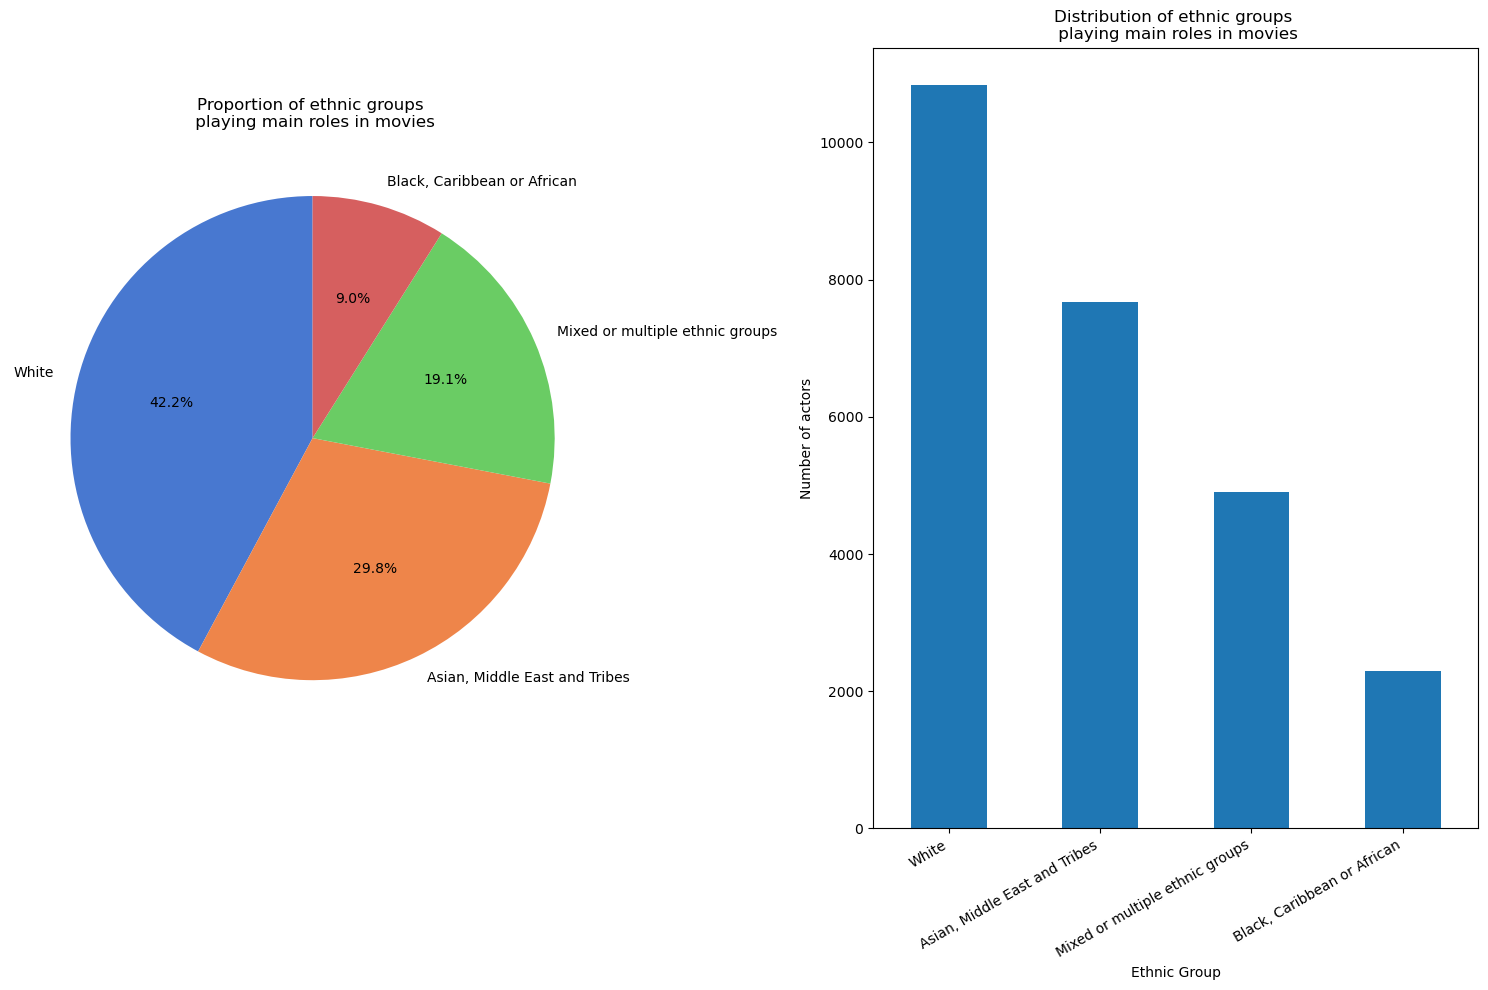

In [174]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))


# Non unique
grouped_ethnicity = characters_movies[characters_movies['Main character'] == 1].copy().groupby(['Ethnic Group']).count()
grouped_ethnicity = grouped_ethnicity['Freebase actor ID'].sort_values(ascending=False)

cmap = sns.color_palette('muted' , len(grouped_ethnicity.index))

grouped_ethnicity.plot(kind='bar', ax=axs[1])
axs[1].set_title("Distribution of ethnic groups \n playing main roles in movies")
axs[1].set_ylabel("Number of actors")
axs[1].set_xticklabels(grouped_ethnicity.index, rotation=30, ha='right')

grouped_ethnicity.plot.pie( autopct='%1.1f%%', startangle=90, title='Proportion of ethnic groups \n playing main roles in movies', label='', ax = axs[0], colors=[ethnic_group_palette[i] for i in grouped_ethnicity.index])

plt.tight_layout()
plt.show()


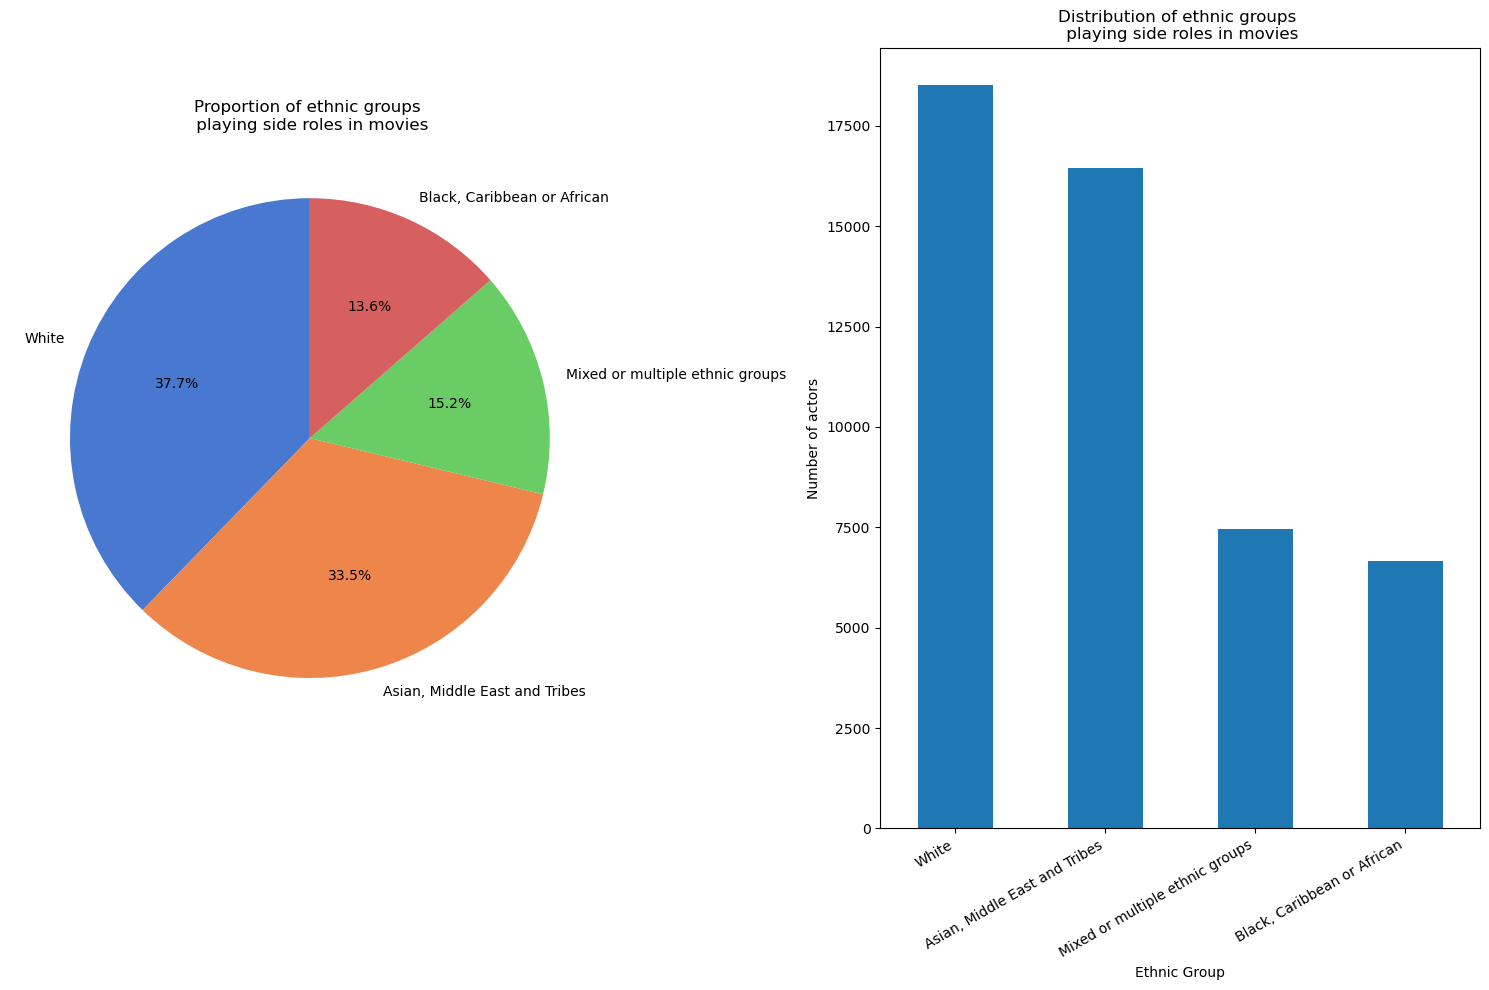

In [175]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))


# Non unique
grouped_ethnicity = characters_movies[characters_movies['Main character'] == 0].copy().groupby(['Ethnic Group']).count()
grouped_ethnicity = grouped_ethnicity['Freebase actor ID'].sort_values(ascending=False)

cmap = sns.color_palette('muted' , len(grouped_ethnicity.index))

grouped_ethnicity.plot(kind='bar', ax=axs[1])
axs[1].set_title("Distribution of ethnic groups \n playing side roles in movies")
axs[1].set_ylabel("Number of actors")
axs[1].set_xticklabels(grouped_ethnicity.index, rotation=30, ha='right')

grouped_ethnicity.plot.pie( autopct='%1.1f%%', startangle=90, title='Proportion of ethnic groups \n playing side roles in movies', label='', ax = axs[0], colors=[ethnic_group_palette[i] for i in grouped_ethnicity.index])

plt.tight_layout()
plt.show()


Before analysing the piecharts let's analyse the barplots representing the distribution of ethnic groups playing main/side roles. As we can see there is much more people playing side roles than main roles, this first observation is logic as in a movie, for 3-5 main characters there is much more side characters. Then we can observe that, in both barplots, the *ranking* of the most important ethnic group based on the number of actor are the same. However we can see that those propotions vary between main roles and side roles. Indeed for main roles the difference in number of actors from an ethnic group to another seems to be contant ($\approx 3000$), but for side roles wa can see that this difference is no more constant. In fact the ethnic group ``Asia, Middle East and Tribes`` is almost as important as the ethnic group ``White`` and those two cathegories dominate the distribution. Similarly, ``Mixed or mulpiple ethnic group`` and ``Black, Caribbean or African`` have a similar number of side actors, even if they represent a smaller part of the barplot. 

The same observations can be done with the two piecharts.


Next we can go deeper in the analysis by splitting each ethnic group in two sub-groups represneting the gender of the actor.

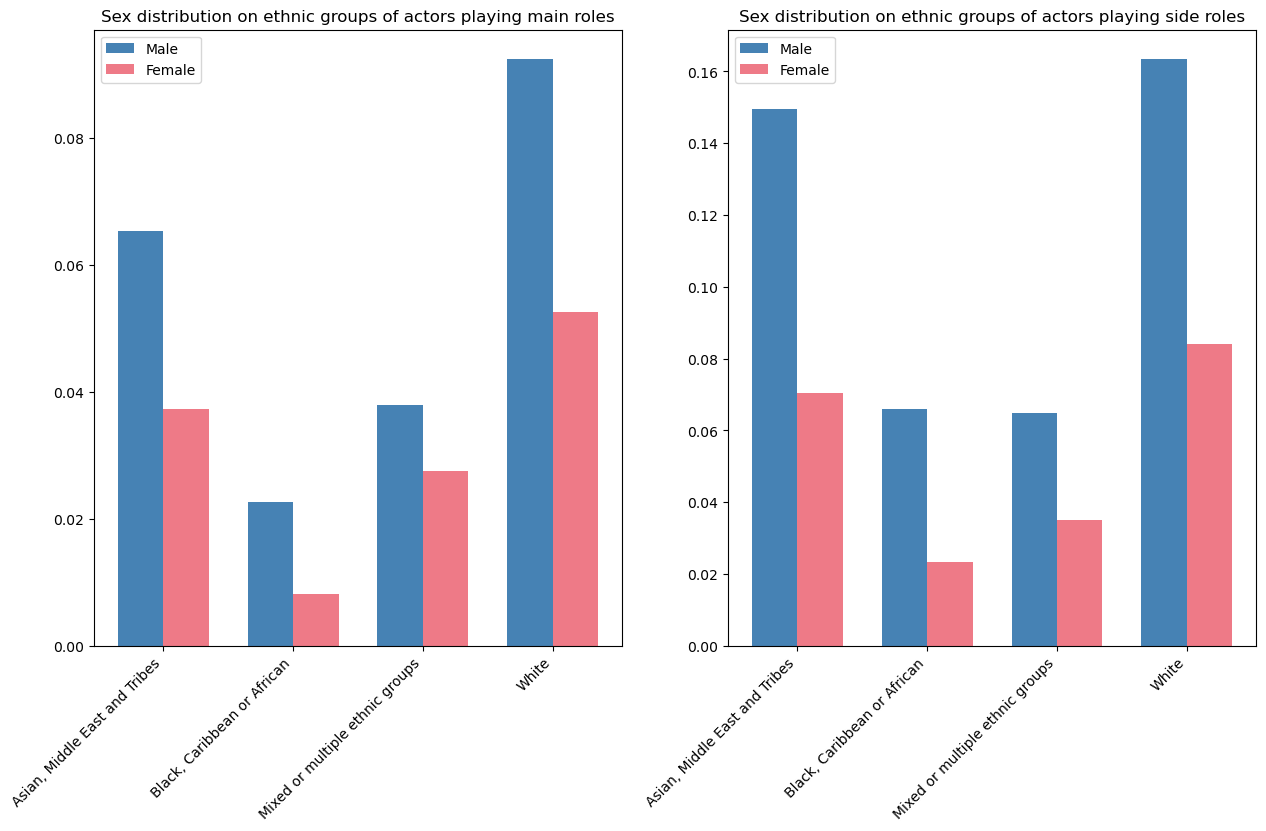

In [176]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

proportion_ethinity_M = characters_movies[np.logical_and(characters_movies['Gender'] == 'M',
                                                         characters_movies['Main character'] == 1)].groupby(['Ethnic Group'])['Freebase actor ID'].apply(lambda x: len(x)/(len(characters_movies['Gender'])))
proportion_ethinity_F = characters_movies[np.logical_and(characters_movies['Gender'] == 'F',
                                                         characters_movies['Main character'] == 1)].groupby(['Ethnic Group'])['Freebase actor ID'].apply(lambda x: len(x)/(len(characters_movies['Gender'])))

bar_width = 0.35
bar_l = np.arange(len(proportion_ethinity_M))
tick_pos = [i + bar_width / 2 for i in bar_l]
axs[0].bar(bar_l, proportion_ethinity_M.values, width=bar_width, color="#4682b4", label="Male")
axs[0].bar(bar_l + bar_width, proportion_ethinity_F.values, width=bar_width, color="#ee7a87", label="Female")
axs[0].set_xticks(tick_pos, proportion_ethinity_M.index, rotation=45, ha='right')

axs[0].legend()
axs[0].set_title("Sex distribution on ethnic groups of actors playing main roles")

proportion_ethinity_M = characters_movies[np.logical_and(characters_movies['Gender'] == 'M',
                                                         characters_movies['Main character'] == 0)].groupby(['Ethnic Group'])['Freebase actor ID'].apply(lambda x: len(x)/(len(characters_movies['Gender'])))
proportion_ethinity_F = characters_movies[np.logical_and(characters_movies['Gender'] == 'F',
                                                         characters_movies['Main character'] == 0)].groupby(['Ethnic Group'])['Freebase actor ID'].apply(lambda x: len(x)/(len(characters_movies['Gender'])))

bar_width = 0.35
bar_l = np.arange(len(proportion_ethinity_M))
tick_pos = [i + bar_width / 2 for i in bar_l]
axs[1].bar(bar_l, proportion_ethinity_M.values, width=bar_width, color="#4682b4", label="Male")
axs[1].bar(bar_l + bar_width, proportion_ethinity_F.values, width=bar_width, color="#ee7a87", label="Female")
axs[1].set_xticks(tick_pos, proportion_ethinity_M.index, rotation=45, ha='right')

axs[1].legend()
axs[1].set_title("Sex distribution on ethnic groups of actors playing side roles")

plt.show()

In this case the results are very similar to the observations done earlier except that we can see that the females represente always rougthly 1/3 of the total ethnic group main/side role; except for the main role played by the ethnic group ``Mixed or multiple ethnic group`` where here it is colser to 50/50.

All the analysis before were done on the overall years, so let's see how the repartition of main/side character has evolved during the years.

c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0, 0.5, 'Frequency of ethnic group')

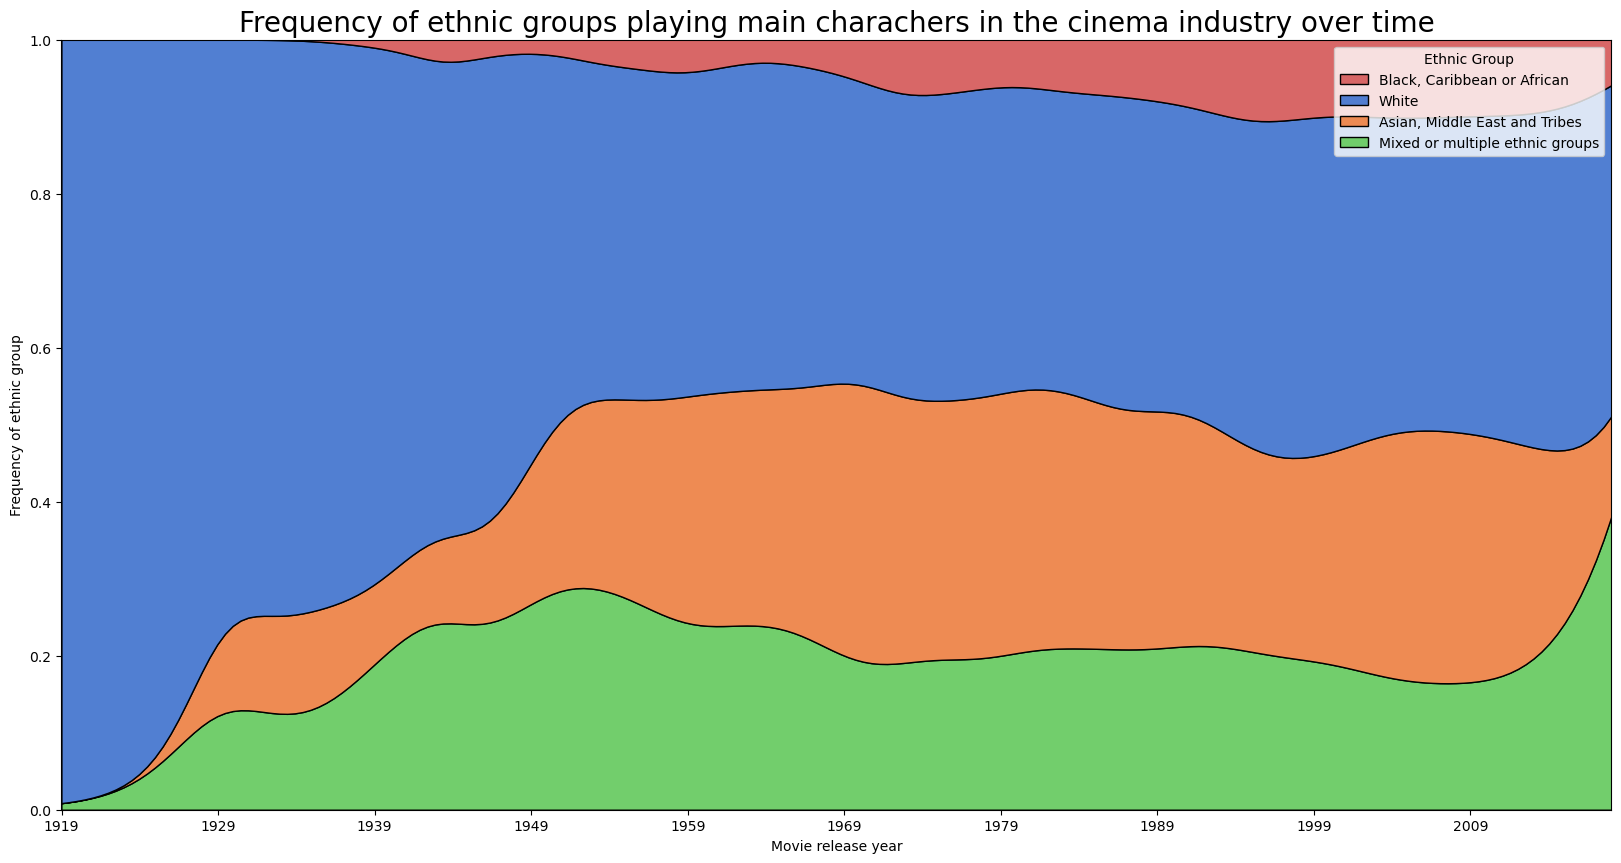

In [177]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=characters_movies[characters_movies['Main character'] == 1],x='Movie release year',hue='Ethnic Group',multiple='fill',palette=ethnic_group_palette,alpha=0.95)
plt.title("Frequency of ethnic groups playing main charachers in the cinema industry over time",fontsize=20)
plt.xticks(np.arange(characters_movies['Movie release year'].min(),characters_movies['Movie release year'].max(),10))
plt.ylabel('Frequency of ethnic group')

c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0, 0.5, 'Frequency of ethnic group')

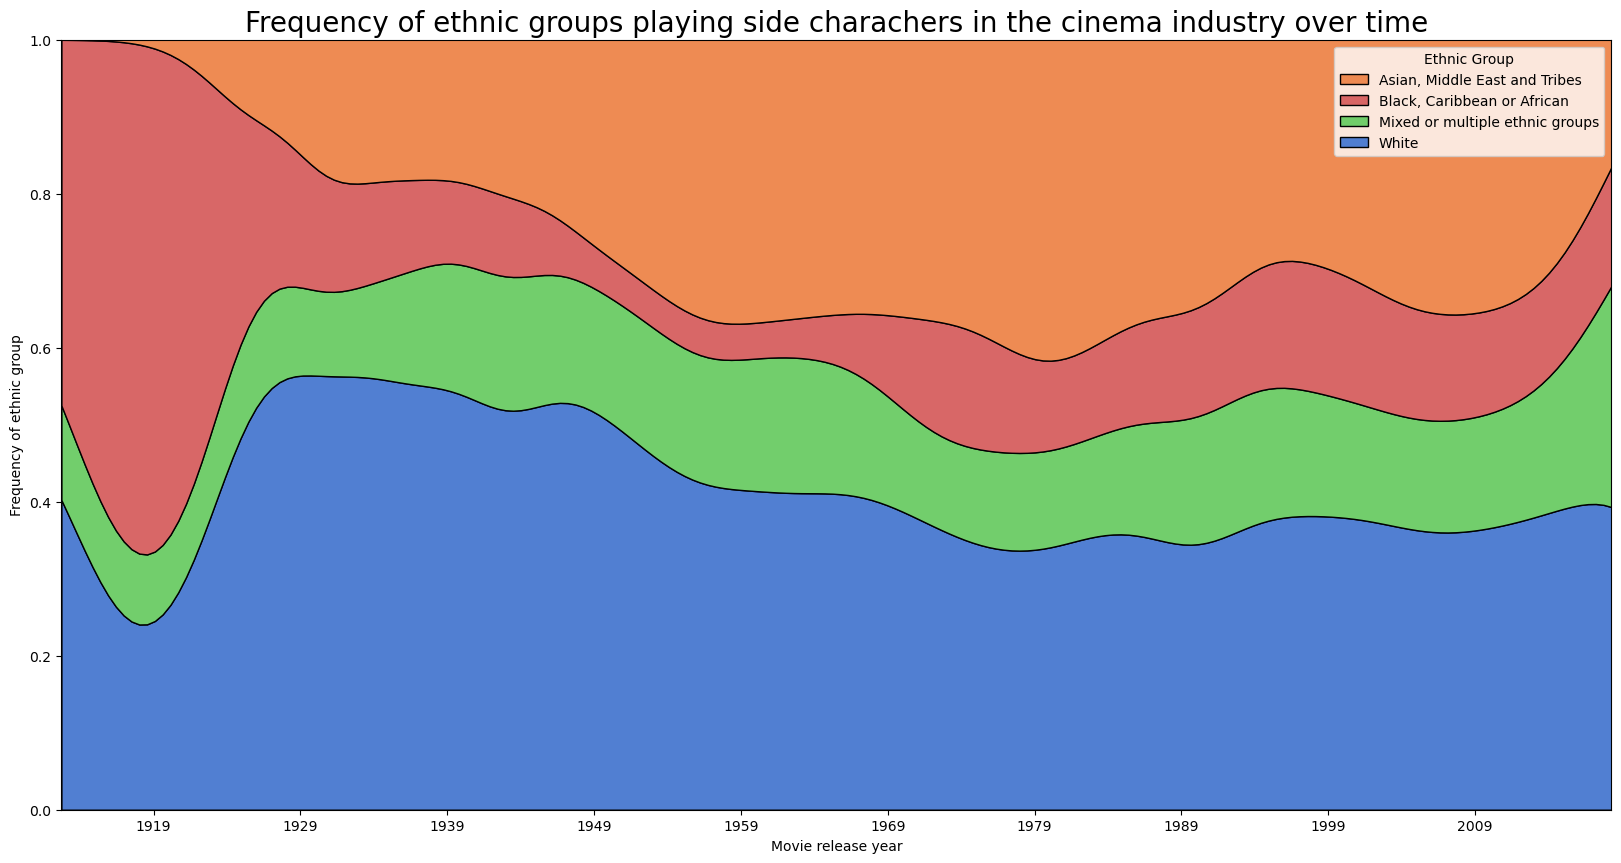

In [178]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=characters_movies[characters_movies['Main character'] == 0],x='Movie release year',hue='Ethnic Group',multiple='fill',palette=ethnic_group_palette,alpha=0.95)
plt.title("Frequency of ethnic groups playing side charachers in the cinema industry over time",fontsize=20)
plt.xticks(np.arange(characters_movies['Movie release year'].min(),characters_movies['Movie release year'].max(),10))
plt.ylabel('Frequency of ethnic group')

We can observe that for the main roles, the repartition was higly dominated by the ethnic group ``White`` until 1960, after this the repartition is much more homogenuous until the last years where we can observe an increase of the ethnic group ``Mixed or multiple ethnic group``. It is important to note that around 1950 the ethnic group ``Asian, Middle east and tribes`` quiclky gained importance, this could be related to the end of the war and the gain in political importance of east contries.

Regarding the repartition of side characters, we can observe that it is much more regular over time. Indeed from 1940 the proportions seems to be set. We can notice that the group ``Mixed or multiple ethnic group`` gain importance until 1960 to reach the same importance as the group ``White``.

## <a id='toc1_3_'></a>[Data Exploration](#toc0_)

### <a id='toc1_3_1_'></a>[Ethnicity Distribution](#toc0_)

Let's create a histogram to better see the Ethnicity Distribution. We will analyze two cases:
- By removing the Duplicates, i.e. count unique actors.
- By keeping the Duplicates, i.e. count actors that appeared multiple times in different movies. 

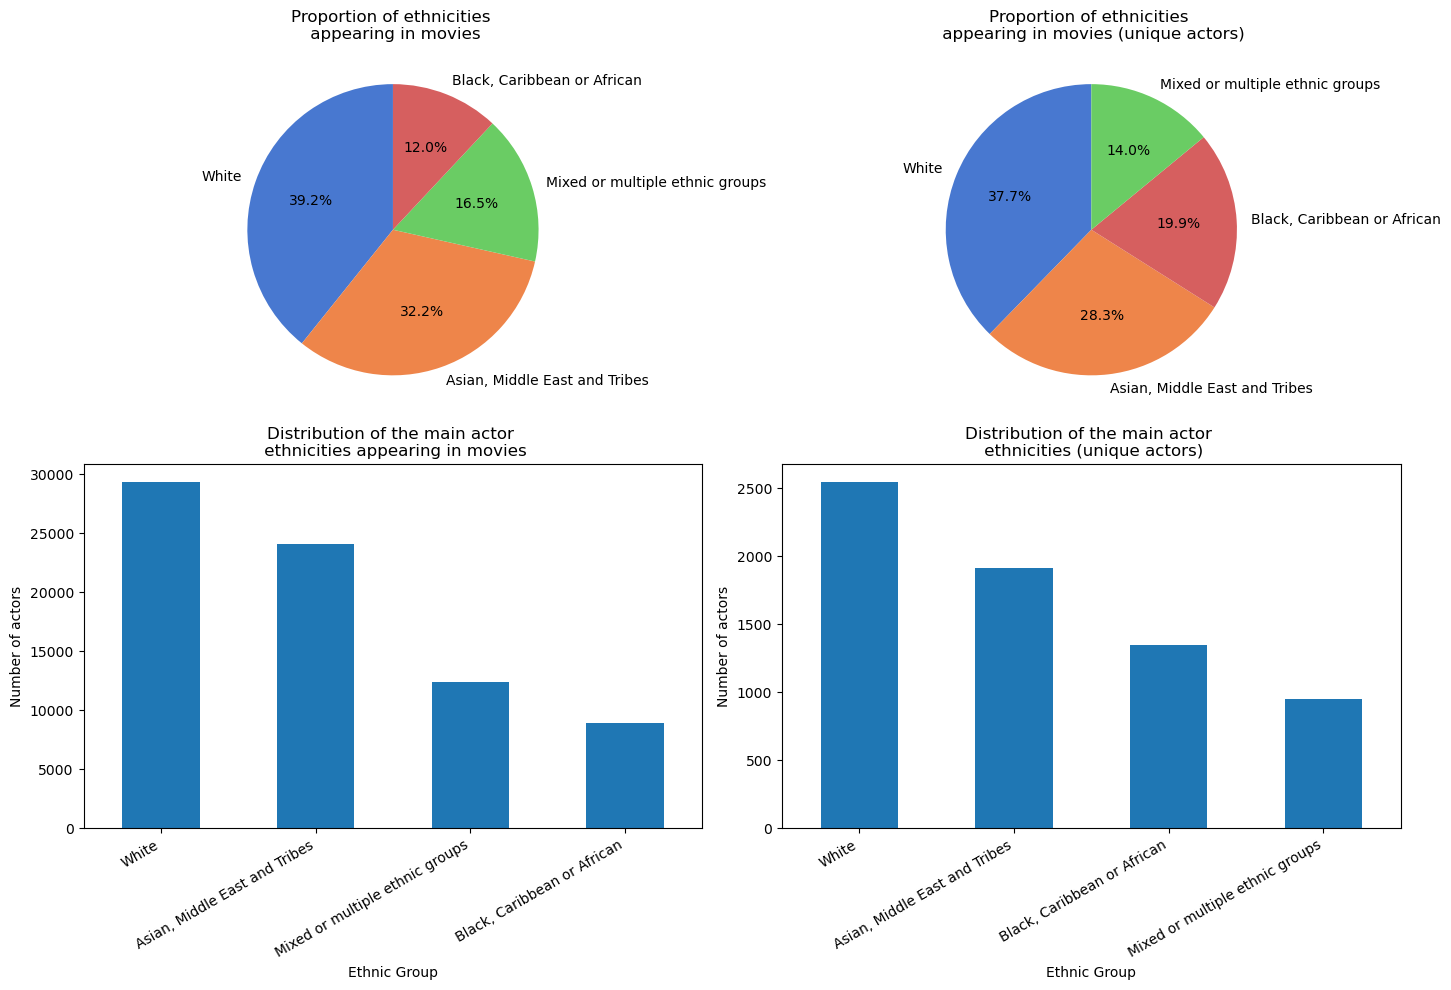

In [179]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))


# Non unique
grouped_ethnicity = characters_movies.copy().groupby(['Ethnic Group']).count()
grouped_ethnicity = grouped_ethnicity['Freebase actor ID'].sort_values(ascending=False)

# Unique
unique_characters_movies = characters_movies.copy().drop_duplicates(subset='Freebase actor ID')
grouped_ethnicity_unique = unique_characters_movies.groupby(['Ethnic Group']).count()
grouped_ethnicity_unique = grouped_ethnicity_unique['Freebase actor ID'].sort_values(ascending=False)

cmap = sns.color_palette('muted' , len(grouped_ethnicity.index))

grouped_ethnicity.plot(kind='bar', ax=axs[1,0])
axs[1,0].set_title("Distribution of the main actor \n ethnicities appearing in movies")
axs[1,0].set_ylabel("Number of actors")
axs[1,0].set_xticklabels(grouped_ethnicity.index, rotation=30, ha='right')

grouped_ethnicity_unique.plot(kind='bar', ax=axs[1,1])
axs[1,1].set_title("Distribution of the main actor \n ethnicities (unique actors)")
axs[1,1].set_ylabel("Number of actors")
axs[1,1].set_xticklabels(grouped_ethnicity_unique.index, rotation=30, ha='right')



grouped_ethnicity.plot.pie( autopct='%1.1f%%', startangle=90, title='Proportion of ethnicities \n appearing in movies', label='', ax = axs[0,0], colors=[ethnic_group_palette[i] for i in grouped_ethnicity.index])

grouped_ethnicity_unique.plot.pie(autopct='%1.1f%%', startangle=90, title='Proportion of ethnicities \n appearing in movies (unique actors)', label='', ax = axs[0,1], colors=[ethnic_group_palette[i] for i in grouped_ethnicity_unique.index])

plt.tight_layout()
plt.show()


We can see that Black, Caribbean or African actors do not tend to appear multiple times in different movies compared to the other ethinicities.

#### <a id='toc1_3_1_1_'></a>[Time-analysis time!](#toc0_)
Let's see how the participation of the different ethnic groups evolved over time. 

c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0, 0.5, 'Frequency of ethnic group')

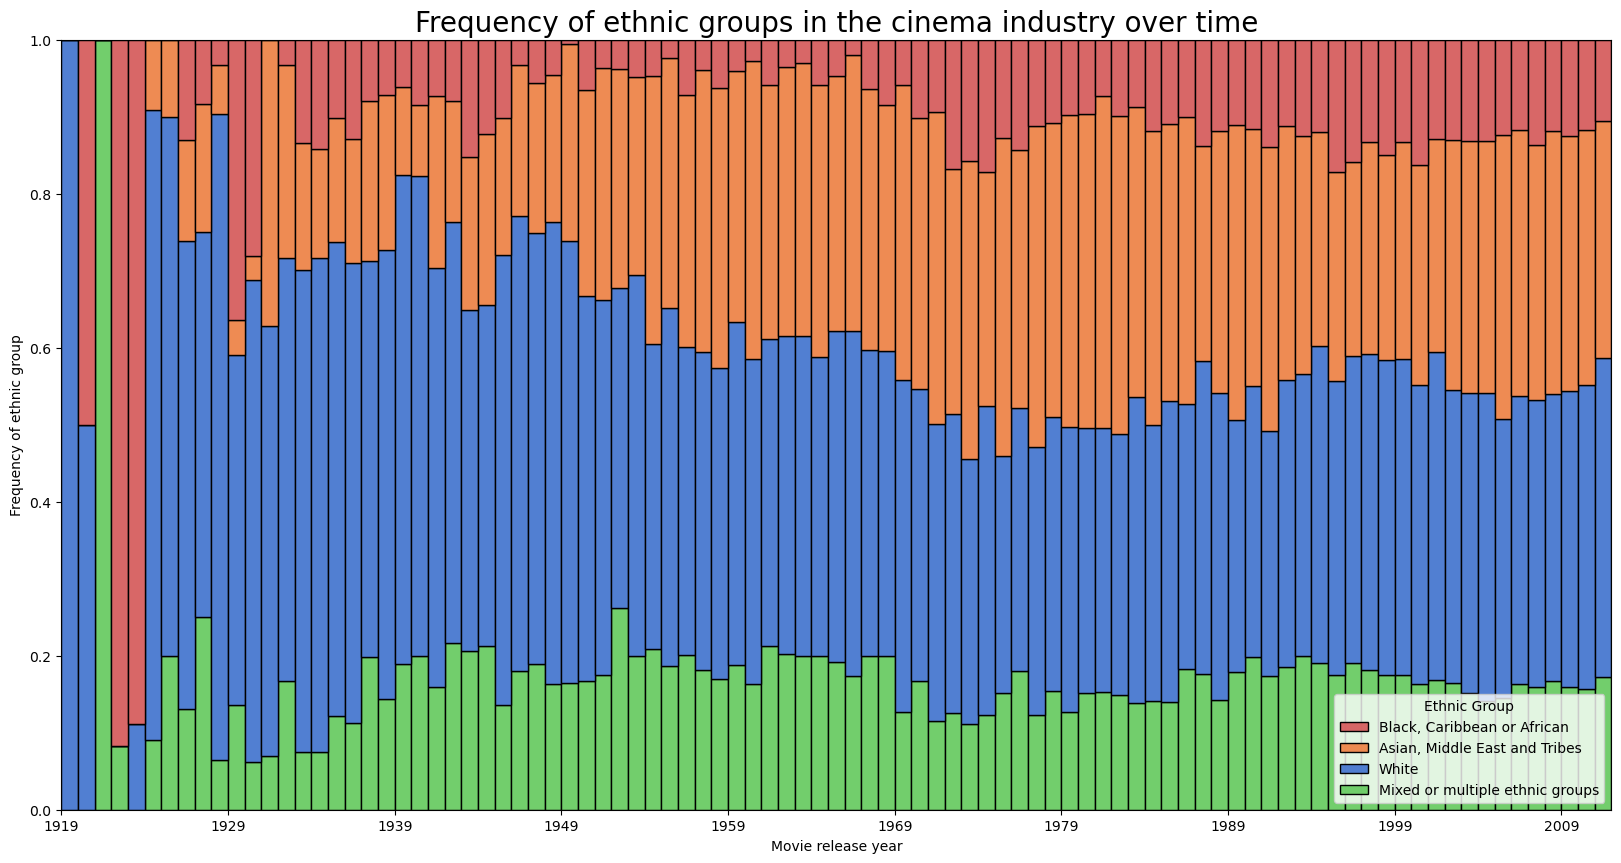

In [180]:
plt.figure(figsize=(20,10))
sns.histplot(data=characters_movies,x='Movie release year',hue='Ethnic Group',multiple='fill',stat='probability', binwidth=1, palette=ethnic_group_palette,alpha=0.95)
plt.title("Frequency of ethnic groups in the cinema industry over time",fontsize=20)
plt.xticks(np.arange(characters_movies['Movie release year'].min(),characters_movies['Movie release year'].max(),10))
plt.ylabel('Frequency of ethnic group')

To better visualize let's "Smooth" the plot:

c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0, 0.5, 'Frequency of ethnic group')

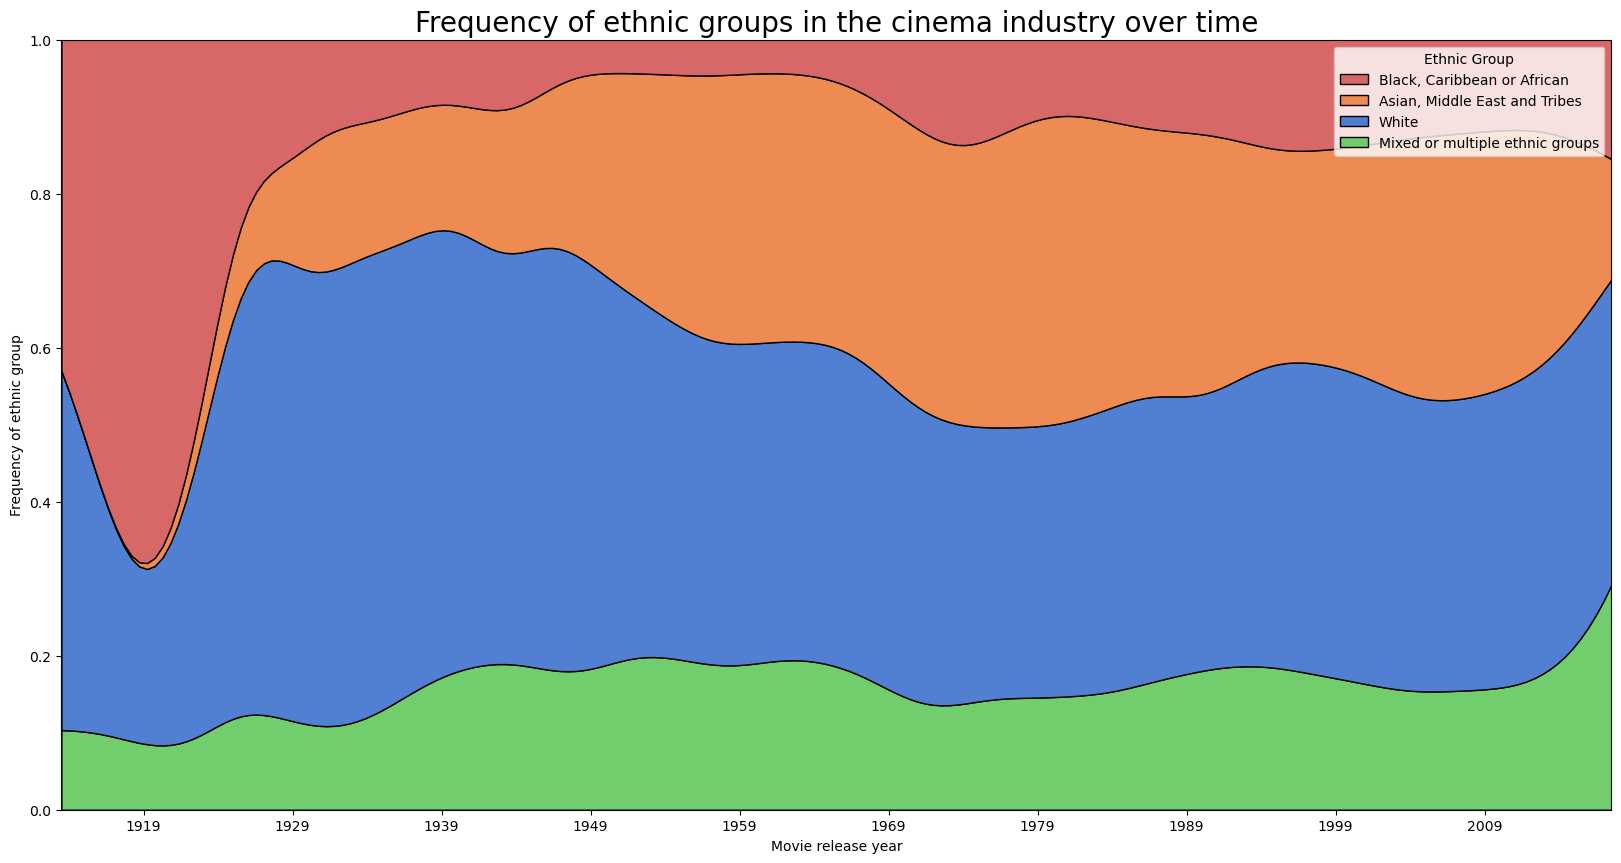

In [181]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=characters_movies,x='Movie release year',hue='Ethnic Group',multiple='fill',palette=ethnic_group_palette,alpha=0.95)
plt.title("Frequency of ethnic groups in the cinema industry over time",fontsize=20)
plt.xticks(np.arange(characters_movies['Movie release year'].min(),characters_movies['Movie release year'].max(),10))
plt.ylabel('Frequency of ethnic group')

We notice a considerably larger proportion of Black, Caribbean or African in the 1920s. This is a surprising feature which can be worth investigating in the future.

Heat maps can also be useful to visualize this information by also taking into account the ethnic diversity of the cast in movies instead of just proportions. The histogram below shows the evolution of the number of characters over the years.

c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


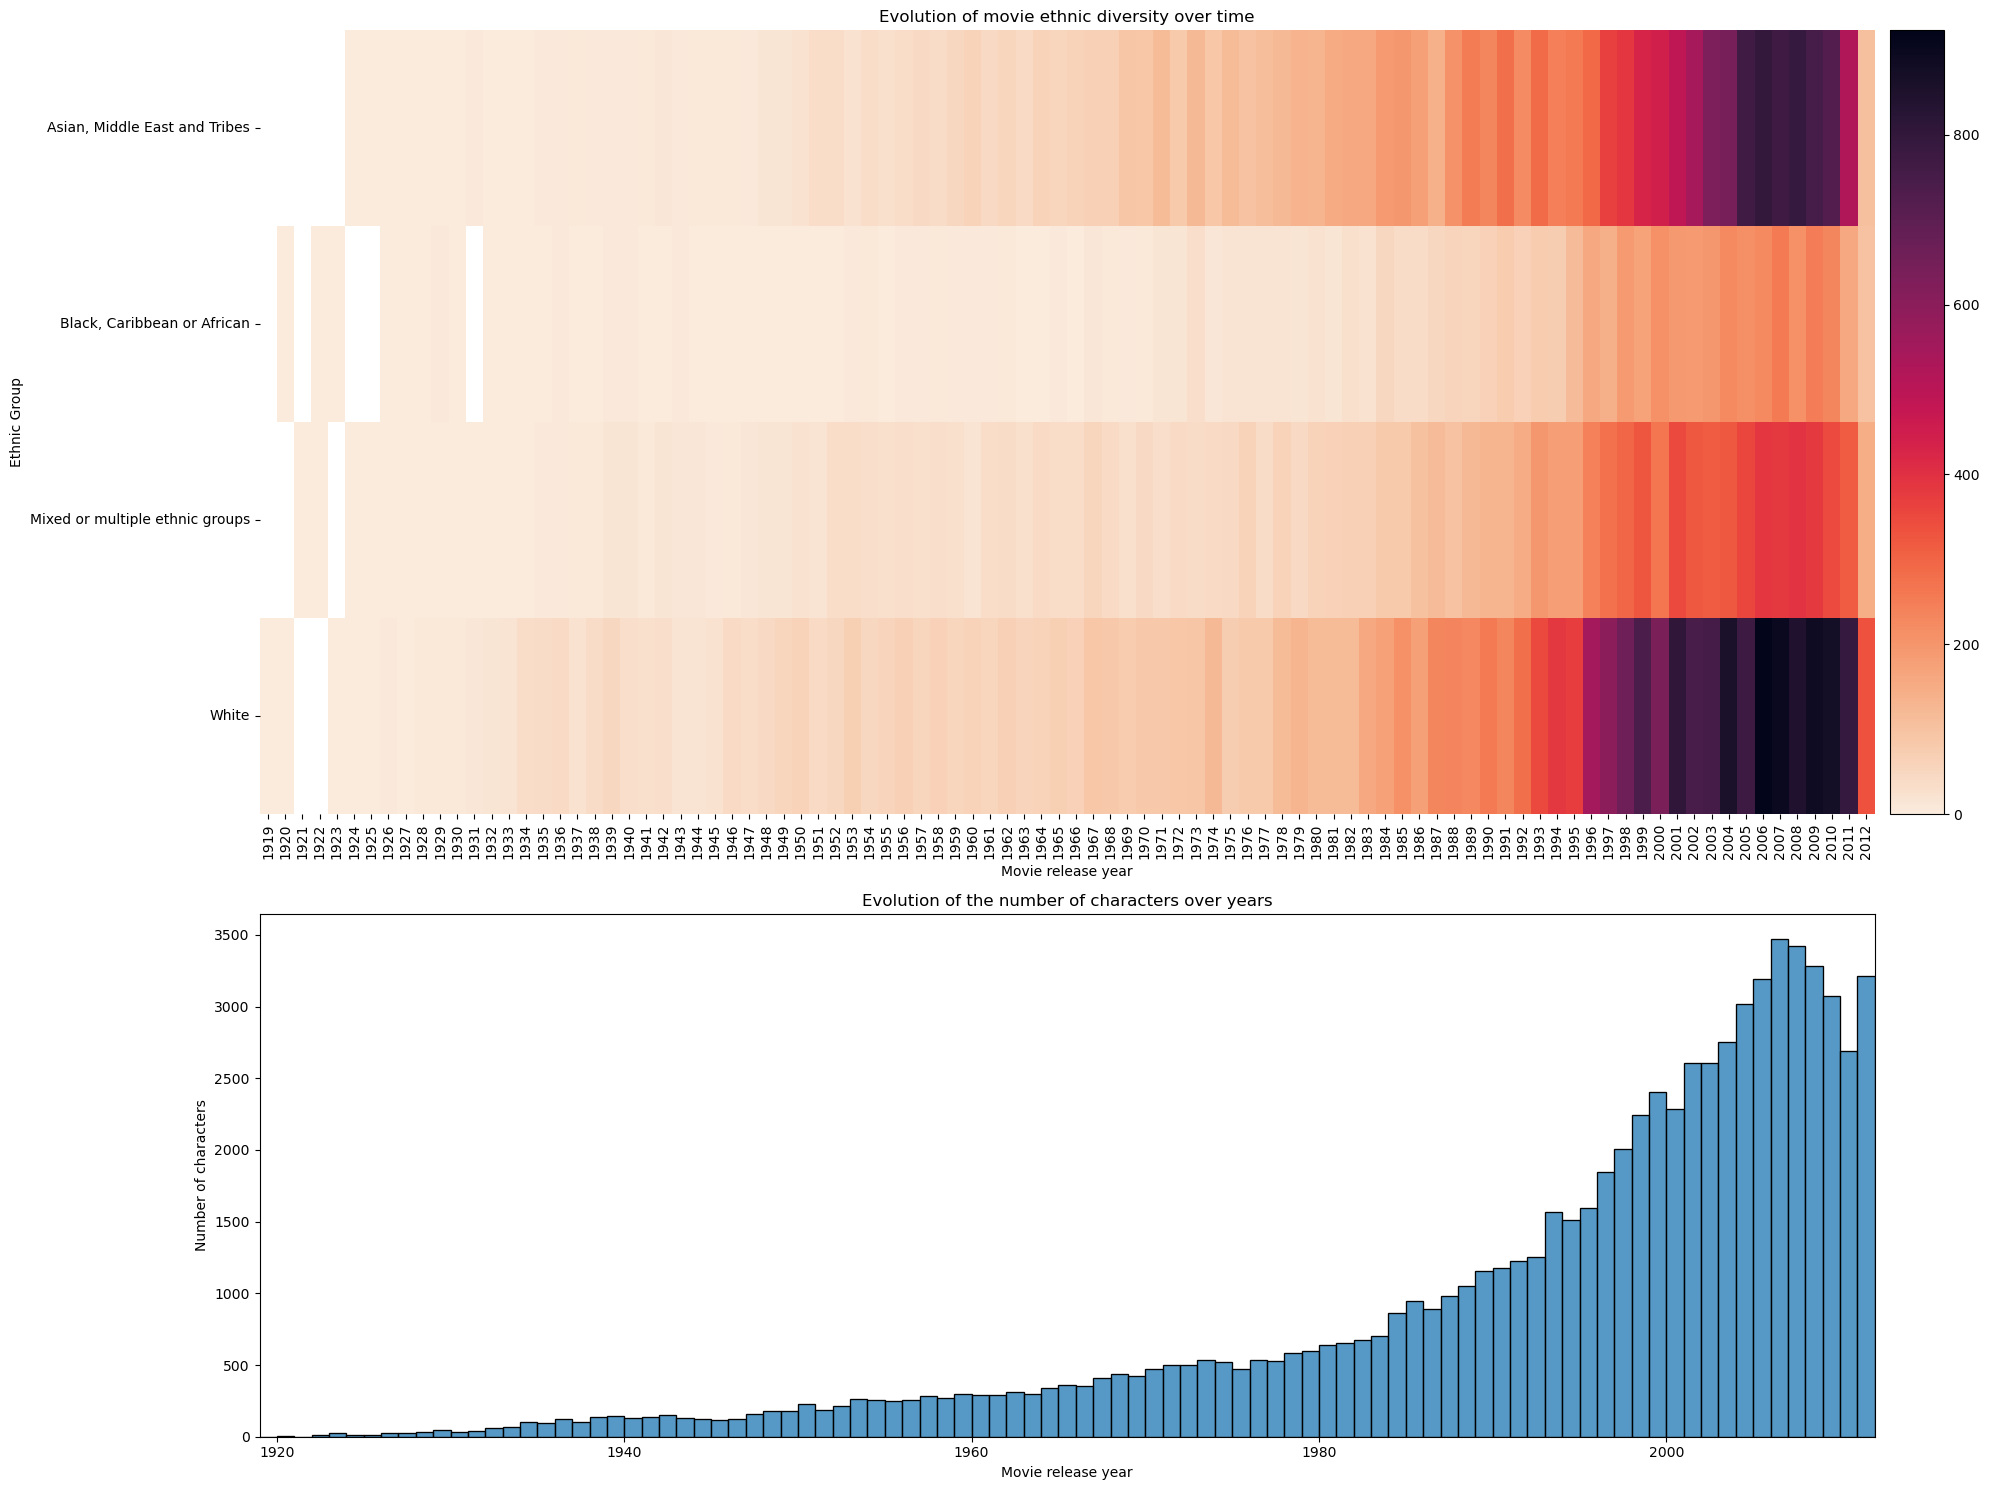

In [182]:
map_year_actor = characters_movies.pivot_table(index=['Movie release year'], columns='Ethnic Group', values='Freebase character ID', aggfunc='count')
df_year_actor = pd.DataFrame(map_year_actor.values,columns=map_year_actor.columns.values.tolist(),index=map_year_actor.index.values.tolist())


fig, axs = plt.subplots(2,2, figsize=(20, 15), gridspec_kw={'height_ratios': [1.5, 1], 'width_ratios': [30, 1]})

# Create the heatmap without a color bar
cax = sns.heatmap(map_year_actor.transpose(),cmap="rocket_r", ax= axs[0, 0], cbar=False)
axs[0, 0].set_title("Evolution of movie ethnic diversity over time")
axs[0, 0].set_xlabel("Movie release year")

# Create a color bar in axs[1,1]
cb = Colorbar(ax=axs[0,1], mappable=cax.get_children()[0])

sns.histplot(data= characters_movies ,x='Movie release year',stat='count', binwidth=1, ax = axs[1, 0])
axs[1, 0].set_title('Evolution of the number of characters over years')
axs[1, 0].set_ylabel('Number of characters')
axs[1, 0].set_xlabel("Movie release year")
axs[1, 0].set_xlim([1919, 2012])

# Hide the unused subplot
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

We can see that the number of actors increased over the years. We also see that the Asian, Middle East and Tribes, and the White Ethnic groups were the ones that increased the most.

#### <a id='toc1_3_1_2_'></a>[Analysis based on gender](#toc0_)
Here the genders of the different Ethnic groups will be analyzed to see disproportions between male and female actors.  

In [183]:
H_ethinity_M = unique_characters_movies[unique_characters_movies['Gender'] == 'M'].groupby(['Ethnic Group'])['Freebase actor ID'].count().sort_values()
H_ethinity_M_reversed = H_ethinity_M*(-1)
H_ethinity_F = unique_characters_movies[unique_characters_movies['Gender'] == 'F'].groupby(['Ethnic Group'])['Freebase actor ID'].count().sort_values()

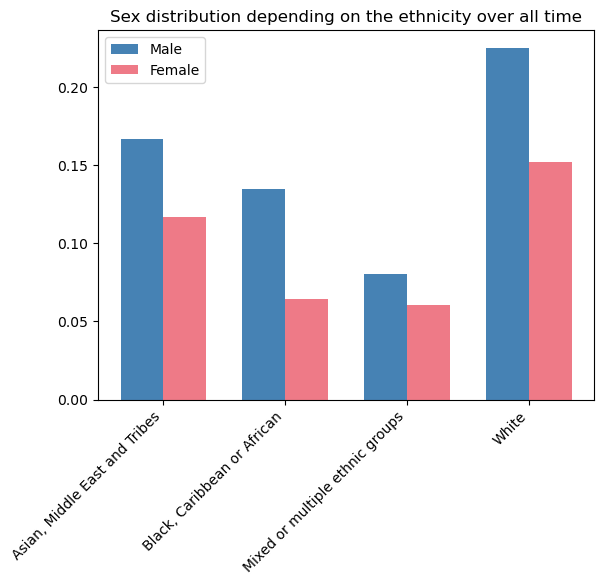

In [184]:
proportion_ethinity_M = unique_characters_movies[unique_characters_movies['Gender'] == 'M'].groupby(['Ethnic Group'])['Freebase actor ID'].apply(lambda x: len(x)/(len(unique_characters_movies['Gender'])))
proportion_ethinity_F = unique_characters_movies[unique_characters_movies['Gender'] == 'F'].groupby(['Ethnic Group'])['Freebase actor ID'].apply(lambda x: len(x)/(len(unique_characters_movies['Gender'])))


bar_width = 0.35
bar_l = np.arange(len(proportion_ethinity_M))
tick_pos = [i + bar_width / 2 for i in bar_l]
plt.bar(bar_l, proportion_ethinity_M.values, width=bar_width, color="#4682b4", label="Male")
plt.bar(bar_l + bar_width, proportion_ethinity_F.values, width=bar_width, color="#ee7a87", label="Female")
plt.xticks(tick_pos, proportion_ethinity_M.index, rotation=45, ha='right')

plt.legend()
plt.title("Sex distribution depending on the ethnicity over all time")

plt.show()

For all ethnic groups we see that there is a majority of men over women. Now let's see the distribution of men and women over the years for different ethnic groups. To do so, same actors can appear in two or more different years.

In [185]:
# Let's groupby Ethincity and Year and separate the genders.
H_ethinity_M_year = characters_movies[characters_movies['Gender'] == 'M'].groupby(['Ethnic Group', 'Movie release year'])['Freebase actor ID'].count().sort_values()

H_ethinity_F_year = characters_movies[characters_movies['Gender'] == 'F'].groupby(['Ethnic Group', 'Movie release year'])['Freebase actor ID'].count().sort_values()

c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

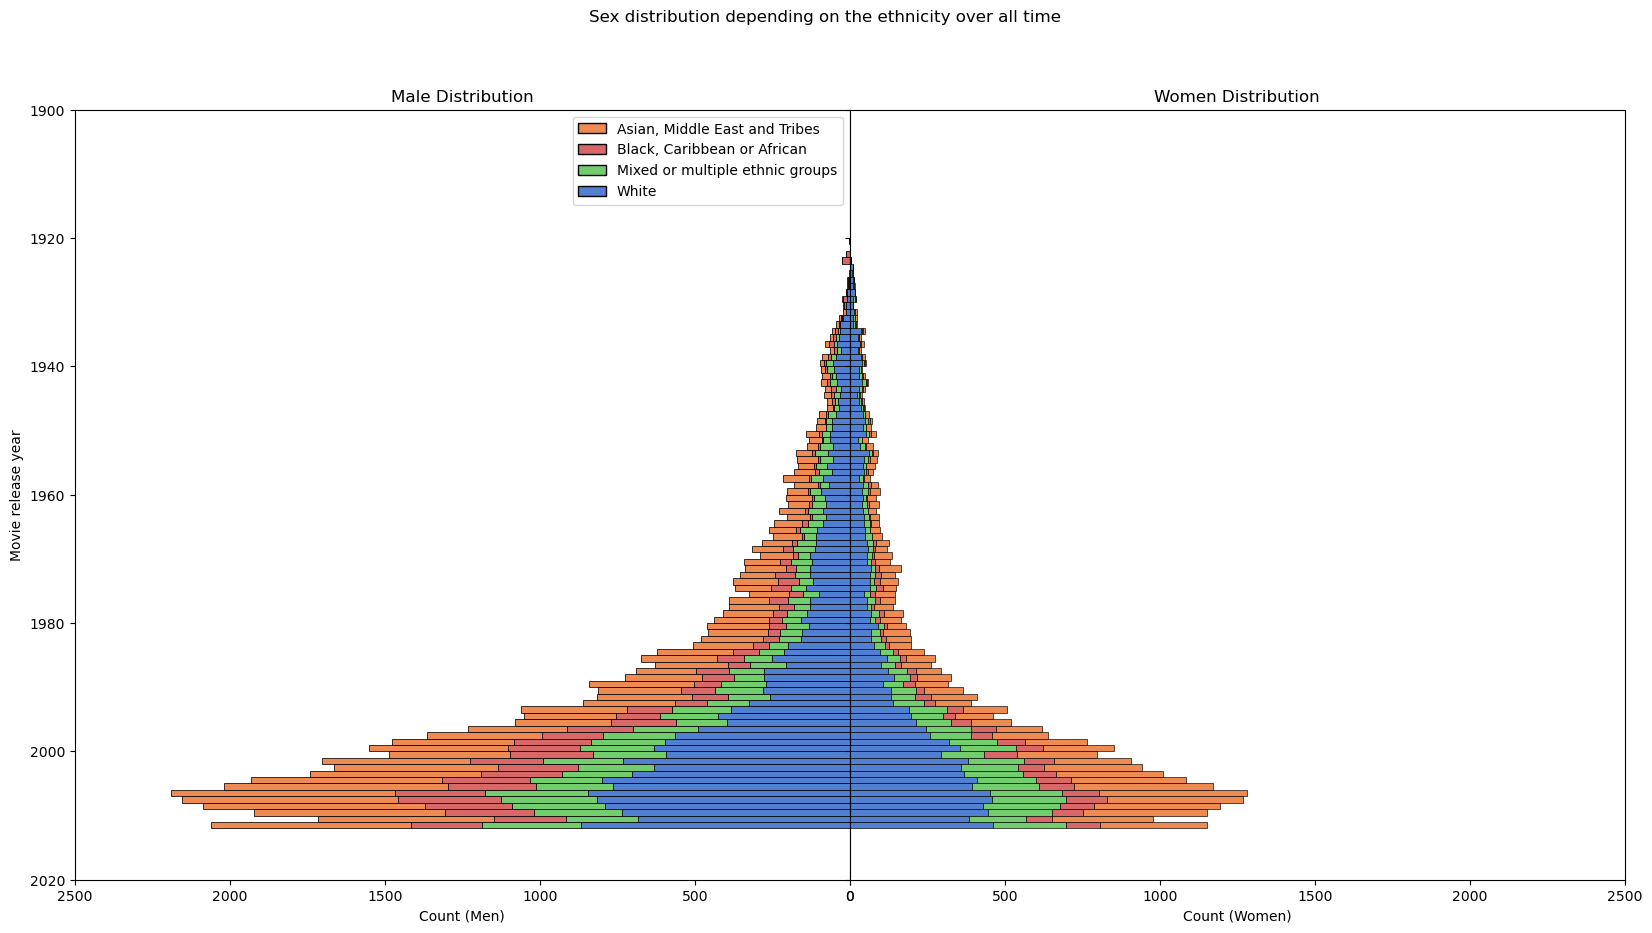

In [186]:
ethnicities_M, years_M = zip(*H_ethinity_M_year.index)
ethnicities_F, years_F = zip(*H_ethinity_F_year.index)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20, 10))
plt.subplots_adjust(wspace=0)

# Plot for men
sns.histplot(ax=ax[0], y=list(years_M), weights=np.abs(H_ethinity_M_year.values), hue=list(ethnicities_M), multiple='stack', stat='count', binwidth=1, palette=ethnic_group_palette,alpha=0.95)

ax[0].set_xlabel("Count (Men)")
ax[0].invert_xaxis()# Flip the x-axis
ax[0].set_ylabel("Movie release year")
ax[0].set_ylim(2020, 1900)  # Flip the y-axis
ax[0].set_xlim(2500, 0)
ax[0].set_title('Male Distribution')

# Plot for women
sns.histplot(ax=ax[1], y=list(years_F), weights=np.abs(H_ethinity_F_year.values), hue=list(ethnicities_F), multiple='stack', stat='count', binwidth=1, legend= False, palette=ethnic_group_palette,alpha=0.95)
  
ax[1].set_xlabel("Count (Women)")
ax[1].set_ylim(2020, 1900)  # Flip the y-axis
ax[1].set_xlim(0, 2500)
ax[1].set_title('Women Distribution')

plt.suptitle("Sex distribution depending on the ethnicity over all time")
plt.show()

We still see that there are almost no years where ethnic groups had more women than men. The most balanced ethnic group is the Mixed one. 

Now let's analyze the age distribution of the actors, and compare them between male and female.


c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 0.98, '')

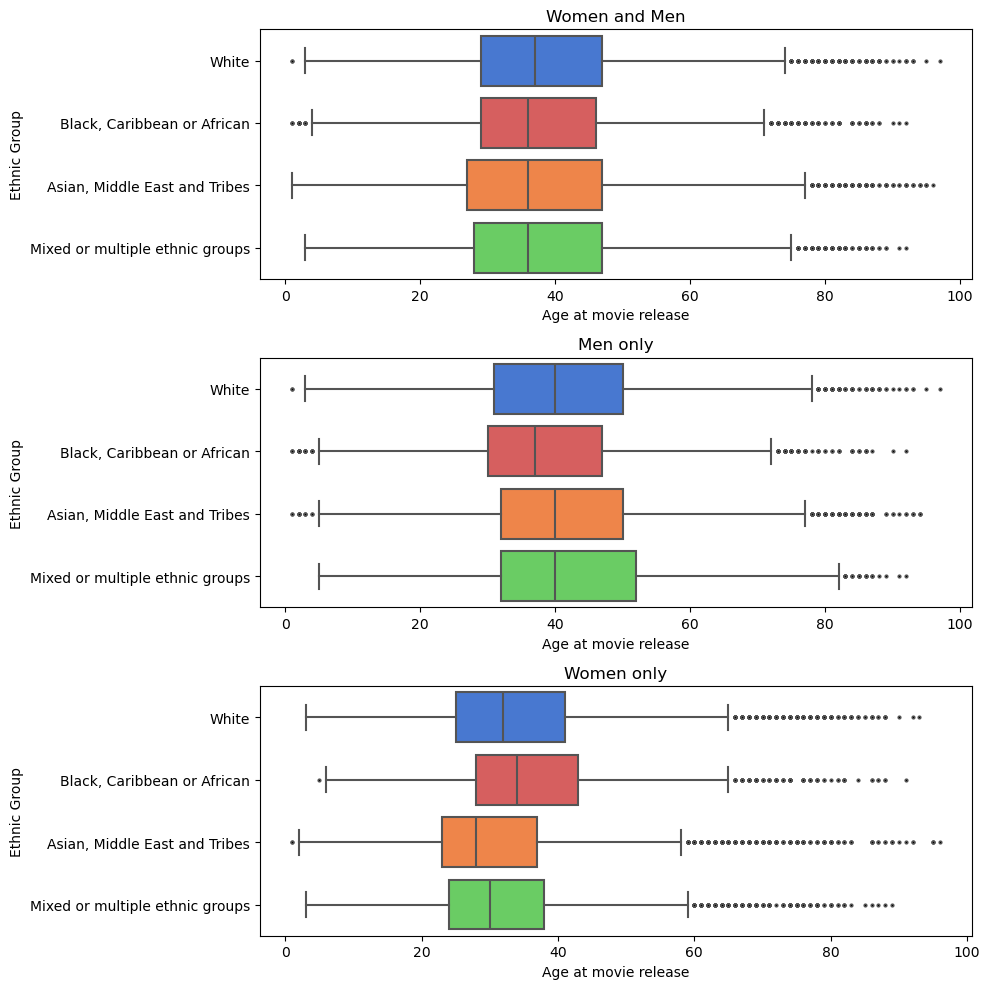

In [187]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
flierprops = dict(marker='o', markerfacecolor='black', markersize=2)

sns.boxplot(data=characters_movies, x="Age at movie release", y="Ethnic Group", 
            ax=ax[0], flierprops=flierprops,
            palette=ethnic_group_palette,saturation=1,
            order=['White', 'Black, Caribbean or African', 'Asian, Middle East and Tribes', 'Mixed or multiple ethnic groups'])
ax[0].set_title('Women and Men')
ax[0].set_xlabel('Age at movie release')

sns.boxplot(data=characters_movies[characters_movies['Gender'] == 'M'], 
            x="Age at movie release", y="Ethnic Group", ax=ax[1], flierprops=flierprops,
            palette=ethnic_group_palette,saturation=1,
            order=['White', 'Black, Caribbean or African', 'Asian, Middle East and Tribes', 'Mixed or multiple ethnic groups'])
ax[1].set_title('Men only')
ax[1].set_xlabel('Age at movie release')

sns.boxplot(data=characters_movies[characters_movies['Gender'] == 'F'], 
            x="Age at movie release", y="Ethnic Group", ax=ax[2], flierprops=flierprops,
            palette=ethnic_group_palette,saturation=1,
            order=['White', 'Black, Caribbean or African', 'Asian, Middle East and Tribes', 'Mixed or multiple ethnic groups'])
ax[2].set_title('Women only')
ax[2].set_xlabel('Age at movie release')
fig.tight_layout()

plt.suptitle('', fontsize=20)

We see that women tend to be much younger than men for all ethnic groups. The smallest difference is in the Black, Caribbean or African ethnic group, where the men are only slightly older than the women.

#### <a id='toc1_3_1_3_'></a>[Movie genres](#toc0_)

First, it's relevant to determine what are the dominant movies genres and how lucrative they are. Knowing this could help us to remove cofactors that could influence the movie revenue depending on the ethnicity.
In order to analyze the distribution of ethnicity depending on the movie genre, we want to duplicate the character to have one entry for each genre of a movie. 

In [188]:
#First, for each character let's isolate all the genres of the movie where it is in
genres = pd.DataFrame(characters_movies['Movie genres'].tolist())
genres.columns = [f'Genre {i}' for i in range(0,len(genres.columns))]

#After this let's create a new dataset, where all the chacharacter will be duplicate to all the genre they're in
characters_genres = pd.DataFrame(columns=np.append(characters_movies.columns.values,'genre'))
for col in genres.columns:
    base_genre = characters_movies.copy()
    base_genre['genre'] = genres[col]
    base_genre = base_genre[base_genre['genre'].notna()]
    characters_genres = pd.concat([characters_genres,base_genre],ignore_index=True)
characters_genres.head(4)
characters_genres[characters_genres['Wikipedia Movie ID'] == 975900].head(6)

C:\Users\ovola\AppData\Local\Temp\ipykernel_29372\993589563.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  characters_genres = pd.concat([characters_genres,base_genre],ignore_index=True)


,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,...,Movie genres,Budget,Plot summary,Vote average,Vote count,Box office revenue,Movie runtime,Movie release year,Main character,genre
0,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,...,"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001,1,Thriller
1,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,...,"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001,1,Thriller
2,975900,2001-08-24,Tres,1959-03-09,M,/m/064b9n,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,...,"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001,0,Thriller
74798,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,...,"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001,1,Science Fiction
74799,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,...,"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001,1,Science Fiction
74800,975900,2001-08-24,Tres,1959-03-09,M,/m/064b9n,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,...,"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001,0,Science Fiction


Now let's determine what are the dominant movie genres, the genres which are the most common among movies.

In [189]:
characters_genres.drop_duplicates(subset='Wikipedia Movie ID')['genre'].value_counts()[0:10]

genre
Thriller            4087
Drama               3174
Crime Fiction       2206
Romantic comedy     1772
Action/Adventure    1007
Romance Film         883
Romantic drama       851
Comedy               765
Musical              667
Parody               563
Name: count, dtype: int64

Let's also verify the genres which have the highest number of characters.

In [190]:
main_genres = characters_genres['genre'].value_counts()[0:10]
main_genres

genre
Drama               41661
Comedy              25638
Romance Film        17655
Thriller            16124
Action              14520
World cinema        12615
Crime Fiction       11065
Action/Adventure    10625
Indie                8609
Romantic drama       8217
Name: count, dtype: int64

We notice that these categories are quite similar which makes sense.

For further movie genres analysis, we should only keep the characters which are playing on the main categories.

In [191]:
main_character_genres = characters_genres.copy()[characters_genres['genre'].isin(main_genres.index)]

c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0, 0.5, 'Proportion of movie genres ')

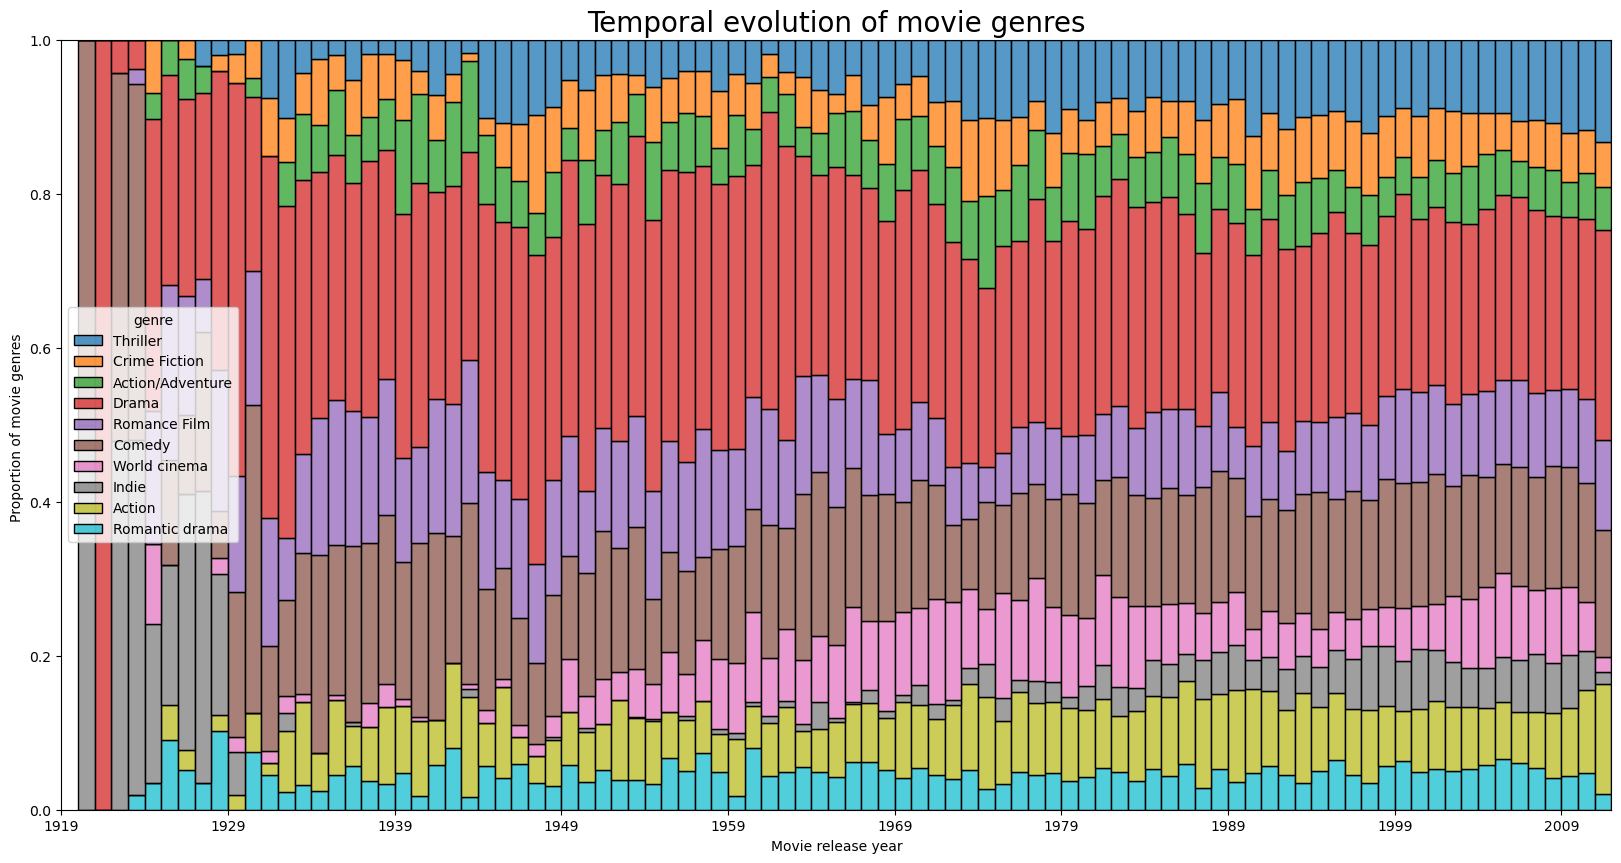

In [192]:
plt.figure(figsize=(20,10))
sns.histplot(data=main_character_genres,x='Movie release year',hue='genre',multiple='fill',stat='probability', binwidth=1)
plt.title("Temporal evolution of movie genres",fontsize=20)
plt.xticks(np.arange(characters_movies['Movie release year'].min(),characters_movies['Movie release year'].max(),10))
plt.ylabel('Proportion of movie genres ')

We notice that before 1929, the data looks a bit strange. In our future analysis we can consider removing the data before this date. Since there are very little characters in this period anyway, this will not impact this analysis.

c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Box office revenue depending on the genre')

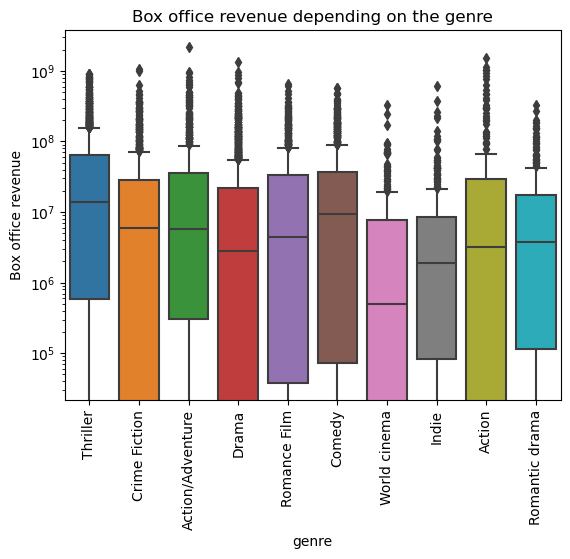

In [193]:
sns.boxplot(data=main_character_genres.drop_duplicates(subset='Wikipedia Movie ID'), x='genre',y='Box office revenue')
plt.yscale('log')
plt.xticks(rotation=90)
plt.title("Box office revenue depending on the genre")


We notice that the most lucrative genre are Thrillers and conversely, the least lucrative genre tends to be World cinema. In addition, Drama presents a larger variability in box office revenue.

Text(0.5, 1.0, 'Distribution of ethnic group depending on the genre')

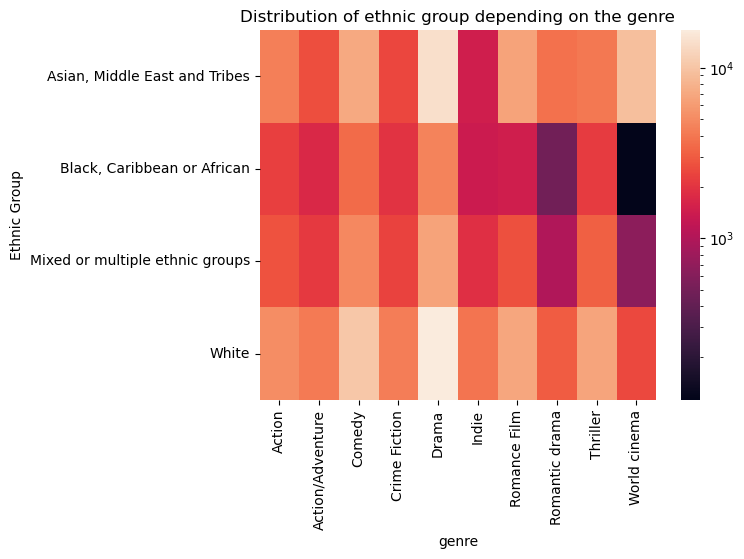

In [194]:
map_movies = pd.crosstab(main_character_genres['Ethnic Group'], main_character_genres['genre'])
sns.heatmap(map_movies,norm = LogNorm())
plt.title("Distribution of ethnic group depending on the genre")

Text(0, 0.5, 'Number of characters')

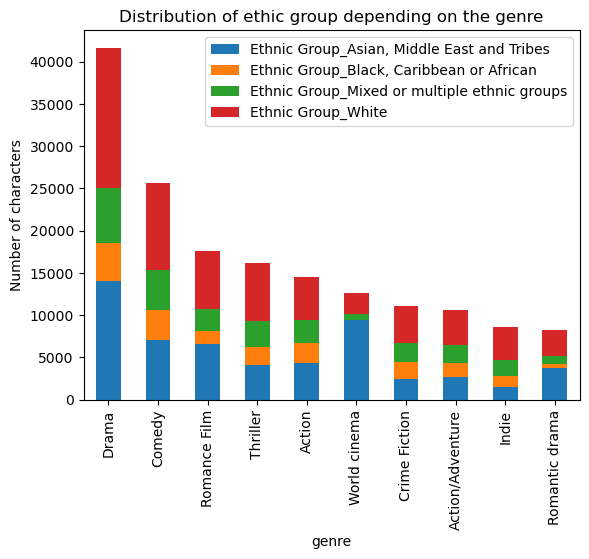

In [195]:
bar_main_character_genres = pd.get_dummies(main_character_genres[['genre','Ethnic Group']], columns=['Ethnic Group'])
sum_genre_etni = bar_main_character_genres.groupby('genre').sum().reindex(main_genres.index)
sum_genre_etni.plot(kind='bar',stacked =True)
plt.title("Distribution of ethic group depending on the genre")
plt.ylabel("Number of characters")

We see that the Drama genre is the most common. Moreover, the Ethnic group proportion seems to be the same regardless of the genre (except for World cinema).

#### <a id='toc1_3_1_4_'></a>[Movie revenue depending on the ethnicity proportion](#toc0_)
In this section, we will analyze the revenue of a movie based on the proportion of the ethnic groups.

In [196]:
movie_revenues=characters_movies.copy().groupby('Movie name').apply(lambda x: pd.DataFrame({
        'Number of ethnicities': x['Ethnic Group'].nunique(),
        'Revenue': x['Box office revenue'].drop_duplicates(),
        'Rating': x['Vote average'].drop_duplicates(),
        "Movie release year" : x['Movie release year'].drop_duplicates()
    }))
movie_revenues=movie_revenues.dropna()

In [197]:
movie_revenues

,,Number of ethnicities,Revenue,Rating,Movie release year
Movie name,,,,,
"'night, Mother",54818,1,442000.0,5.8,1986.0
(500) Days of Summer,14461,2,60722734.0,7.2,2009.0
.45,56101,2,0.0,5.2,2006.0
"10,000 BC",73639,2,269784201.0,5.1,2008.0
10.5,35390,2,0.0,5.9,2004.0
...,...,...,...,...,...
Zouzou,67191,1,0.0,5.0,1934.0
Zulu,70541,1,8000000.0,7.4,1964.0
Zyzzyx Road,67570,1,30.0,4.0,2006.0


c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Temporal evolution of the box office revenue')

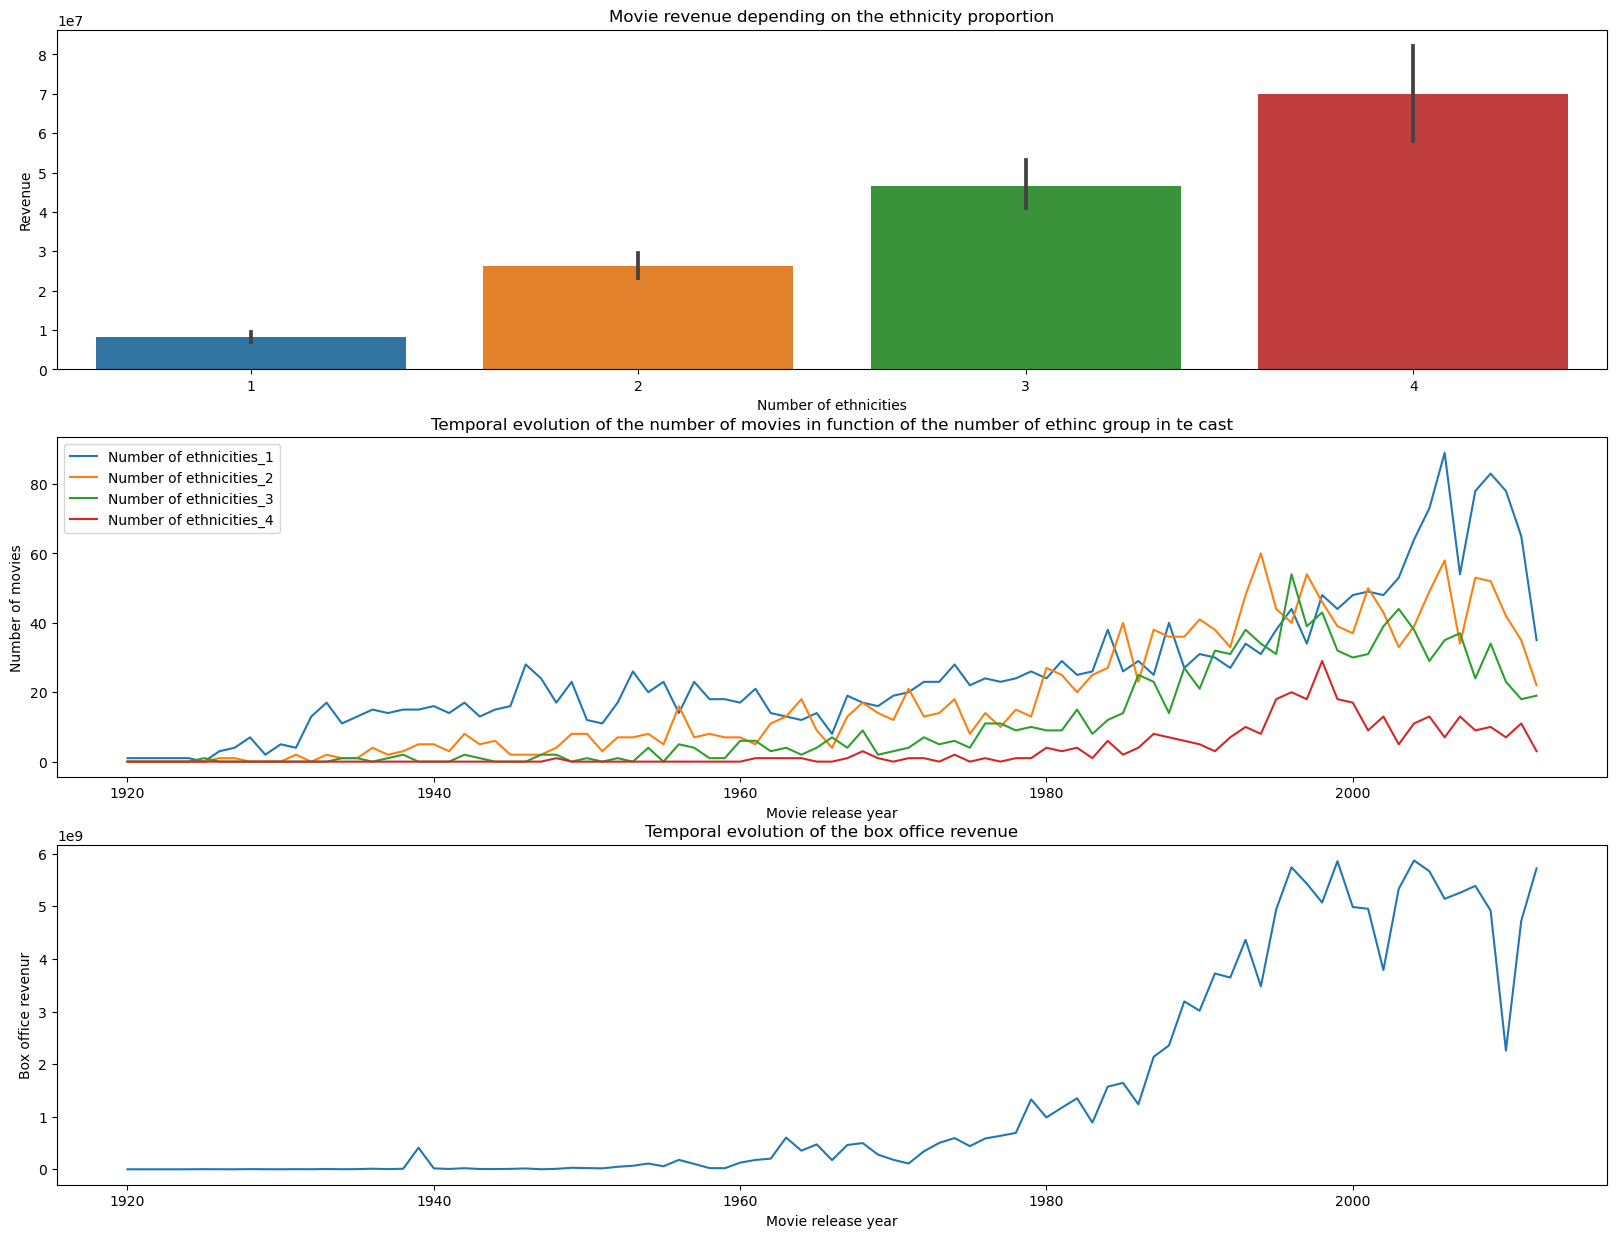

In [198]:
fig, axs = plt.subplots(3,1, figsize=(20, 15))

sns.barplot(data=movie_revenues, x='Number of ethnicities', y='Revenue',ax=axs[0])
axs[0].set_title('Movie revenue depending on the ethnicity proportion')
axs[0].set_xlim

ethnicity_prop_year = pd.get_dummies(movie_revenues[['Number of ethnicities','Movie release year']], columns=['Number of ethnicities'])
ethnicity_prop_year = ethnicity_prop_year.groupby('Movie release year').sum()
ethnicity_prop_year.plot(ax=axs[1])
axs[1].set_ylabel("Number of movies")
axs[1].set_title("Temporal evolution of the number of movies in function of the number of ethinc group in te cast")

revenue_year = movie_revenues.groupby('Movie release year')['Revenue'].sum()
revenue_year.plot(ax=axs[2])
axs[2].set_ylabel("Box office revenur")
axs[2].set_title("Temporal evolution of the box office revenue")

This plot shows that as there are more ethnicities in a movie, the revenue of the movie tends to increase. However, keep in mind that the uncertainty also increases.

In [199]:
stats.pearsonr(movie_revenues['Number of ethnicities'],movie_revenues['Revenue'])

PearsonRResult(statistic=0.26235265895889115, pvalue=5.198765013047837e-86)

The above observation is confirmed by a Pearson correlation test, indeed the two variables are correlated, the differences are statistically significant. We still keep in mind that correlation doesn't imply causation.

In [200]:
from scipy.stats import ttest_ind
from itertools import combinations

for (x,y) in list(combinations(range(1,5),2)):
    p_value=ttest_ind(movie_revenues[movie_revenues['Number of ethnicities']==x]['Revenue'],
                    movie_revenues[movie_revenues['Number of ethnicities']==y]['Revenue'], equal_var=False, nan_policy='omit')[1]
    print("ttest p-value result between ", x," ethnicities and ", y, " ethnicities in a movie: ",  p_value)


ttest p-value result between  1  ethnicities and  2  ethnicities in a movie:  7.89840184421098e-25
ttest p-value result between  1  ethnicities and  3  ethnicities in a movie:  1.1449154416299485e-32
ttest p-value result between  1  ethnicities and  4  ethnicities in a movie:  3.1724574637132977e-19
ttest p-value result between  2  ethnicities and  3  ethnicities in a movie:  4.645279972519824e-09
ttest p-value result between  2  ethnicities and  4  ethnicities in a movie:  1.5922768715317673e-10
ttest p-value result between  3  ethnicities and  4  ethnicities in a movie:  0.0011297882816921094


We see that the averages of revenues of the various number of ethnicities are statistically different. So, we could search for a causation based on these parameters.

Next, we can check if the different ethnic groups tend to play in movies with different box office revenues.

c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Box office revenue (log scale)')

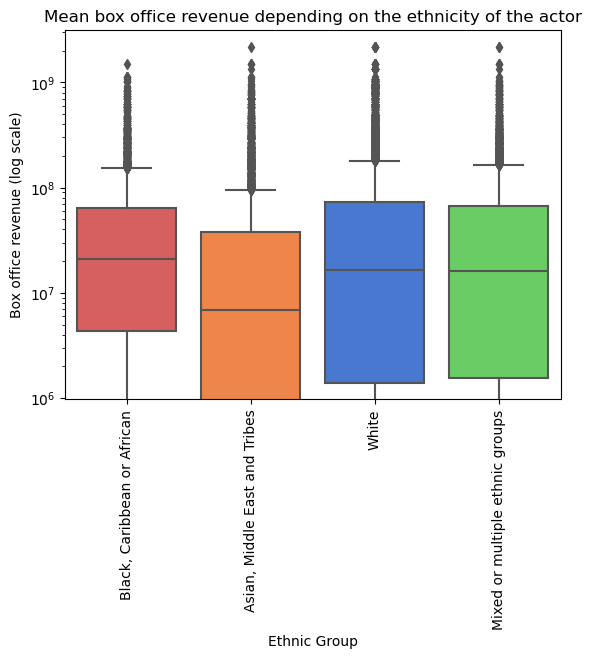

In [201]:
sns.boxplot(data=characters_movies, y="Box office revenue", x="Ethnic Group",palette=ethnic_group_palette,saturation=1)
plt.title("Mean box office revenue depending on the ethnicity of the actor")
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylabel("Box office revenue (log scale)")

In [202]:
ethnic_groups=characters_movies['Ethnic Group'].unique()
for (x,y) in list(combinations(ethnic_groups,2)):
    p_value=ttest_ind(characters_movies[characters_movies['Ethnic Group']==x]['Box office revenue'],
                      characters_movies[characters_movies['Ethnic Group']==y]['Box office revenue'], equal_var=False, nan_policy='omit')[1]
    print("ttest p-value result between ", x," and ", y, ": ",  p_value)



ttest p-value result between  Black, Caribbean or African  and  Asian, Middle East and Tribes :  6.956415180450578e-11
ttest p-value result between  Black, Caribbean or African  and  White :  2.8153228382770325e-17
ttest p-value result between  Black, Caribbean or African  and  Mixed or multiple ethnic groups :  0.16331722452751238
ttest p-value result between  Asian, Middle East and Tribes  and  White :  4.0147771469086293e-57
ttest p-value result between  Asian, Middle East and Tribes  and  Mixed or multiple ethnic groups :  6.604191787284307e-16
ttest p-value result between  White  and  Mixed or multiple ethnic groups :  1.3486641571432553e-12


We observe that Black, Caribbean or Afcrican actors and actors of mixed background play in movies with similar average box office revenues. The other groups have a statistical difference. We can also see on the graph that white actors tend to play in the movies with highest box office revenues, while the Asian, Middle East and Tribes group appears in those with the lowest revenue.

#### <a id='toc1_3_1_5_'></a>[Role Analysis](#toc0_)
For this part, we will be looking at the importance that each ethnic group has in a movie. 

We will start by seeing the proportion of actors that were unnamed, which means that they were probably not playing a major role in the movie.

Text(0, 0.5, 'Percentage of unnamed actors')

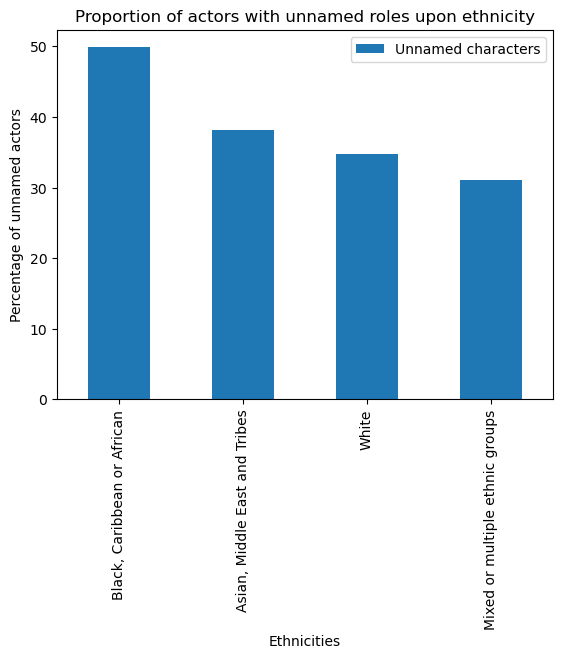

In [203]:
proportion_unnamed_actors = characters_movies.copy().groupby('Ethnic Group').apply(lambda x: pd.Series({
        'Unnamed characters': x['Character name'].isna().sum()*100/len(x['Character name'])
    })).sort_values(ascending=False,by = 'Unnamed characters')
proportion_unnamed_actors.plot(kind='bar')
plt.title("Proportion of actors with unnamed roles upon ethnicity")
plt.xlabel('Ethnicities')
plt.ylabel('Percentage of unnamed actors')

We see that Black, Caribbean or African are the ones with the highest amount of missing values while the other ethnicities have similar amounts of missing actor names. Let's see if this is the case over time:

c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0, 0.5, 'Proportion of actors')

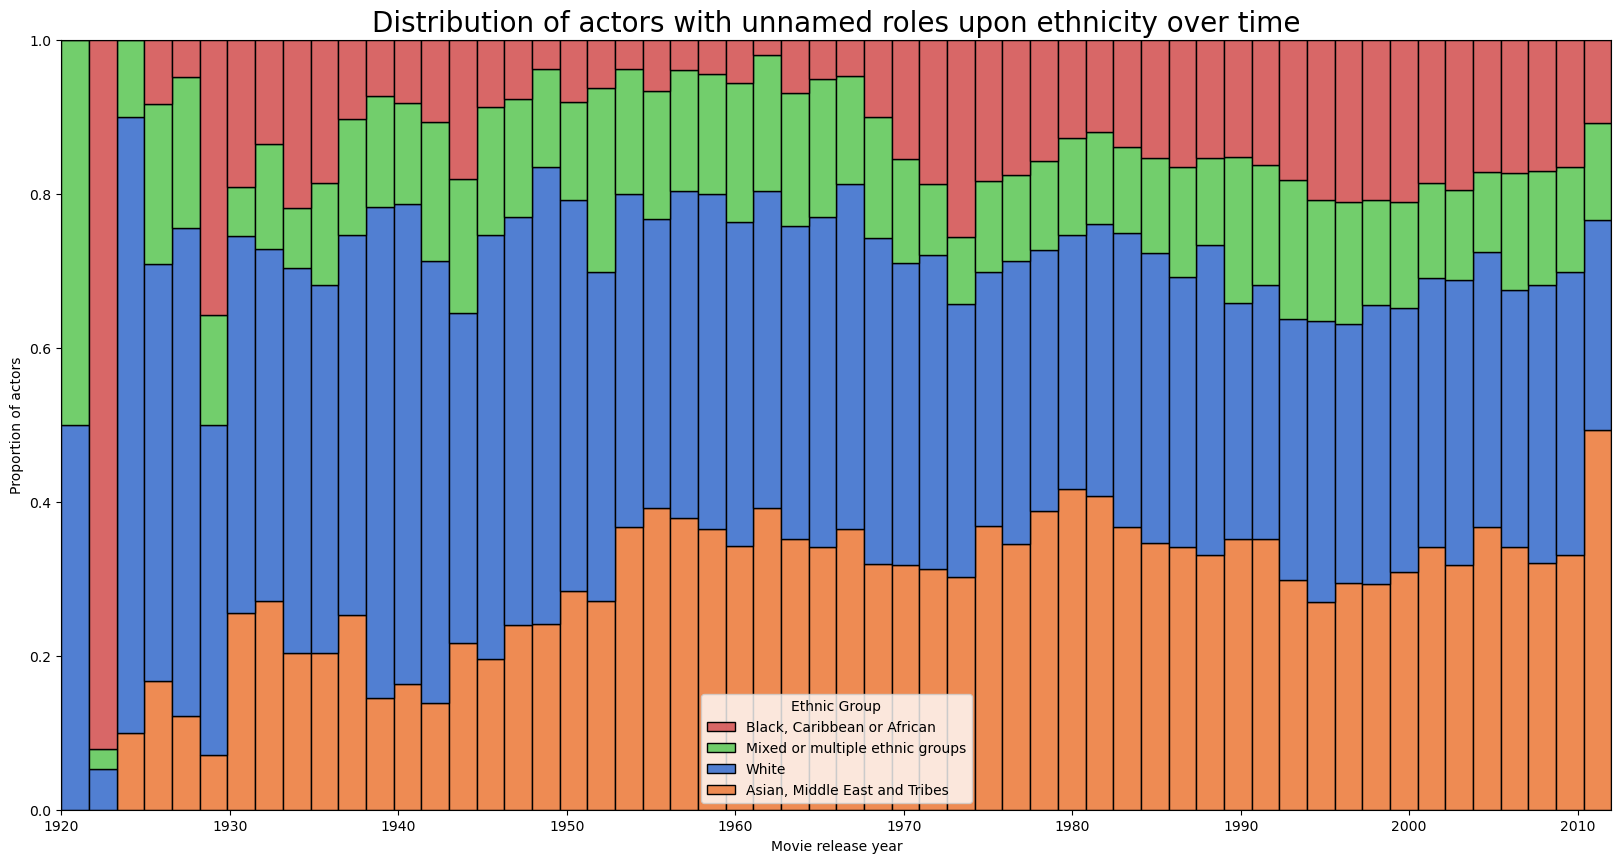

In [204]:
unnamed_actors = characters_movies[characters_movies['Character name'].isna()]
plt.figure(figsize=(20,10))
sns.histplot(data=unnamed_actors,x='Movie release year',hue='Ethnic Group',multiple='fill',palette=ethnic_group_palette,alpha=0.95)
plt.title("Distribution of actors with unnamed roles upon ethnicity over time",fontsize=20)
plt.xticks(np.arange(unnamed_actors['Movie release year'].min(),unnamed_actors['Movie release year'].max(),10))
plt.ylabel('Proportion of actors')


Here we see that despite Black, Caribbean or African, were the ones with higher percentage, since there are not that many actors in comparison to the other ethinc groups, their yearly percentage is lower. Asian, Middle East and Tribes, and White, are the ones with more missing names for each year in proportion to the other groups. 

c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(5.0, 6.2)

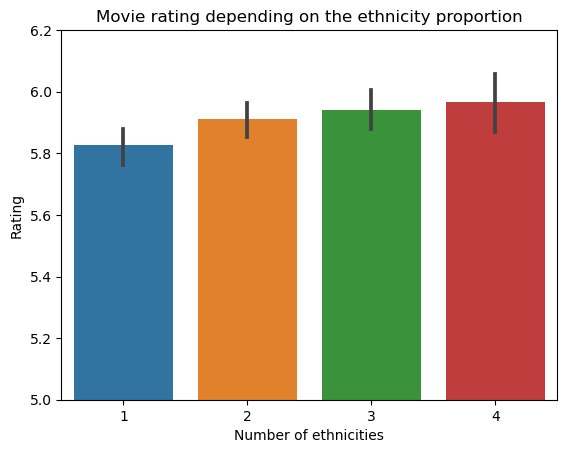

In [205]:
sns.barplot(data=movie_revenues, x='Number of ethnicities', y='Rating')
plt.title('Movie rating depending on the ethnicity proportion')
plt.ylim([5, 6.2])

We see that contrary to the revenue, the ratings are much more similar. Nonetheless, we perform a pearson correlation test, to see if there is a relationship between the two, keeping always in mind de difference between causation and correlation.

In [206]:
stats.pearsonr(movie_revenues['Number of ethnicities'],movie_revenues['Revenue'])

PearsonRResult(statistic=0.26235265895889115, pvalue=5.198765013047837e-86)

As the p-value of this this test is much smaller than 0.05, we can conclude that despite the small differences, there is a positive statistically significant correlation between the number of ethnicities and the rating of a movie.

In [207]:
for (x,y) in list(combinations(range(1,5),2)):
    p_value=ttest_ind(movie_revenues[movie_revenues['Number of ethnicities']==x]['Rating'],
                    movie_revenues[movie_revenues['Number of ethnicities']==y]['Rating'], equal_var=False, nan_policy='omit')[1]
    print("ttest p-value result between ", x," ethnicities and ", y, " ethnicities in a movie: ",  p_value)

ttest p-value result between  1  ethnicities and  2  ethnicities in a movie:  0.05000820349323007
ttest p-value result between  1  ethnicities and  3  ethnicities in a movie:  0.010756856399691477
ttest p-value result between  1  ethnicities and  4  ethnicities in a movie:  0.017709892019605582
ttest p-value result between  2  ethnicities and  3  ethnicities in a movie:  0.47275820785859635
ttest p-value result between  2  ethnicities and  4  ethnicities in a movie:  0.33338885870192014
ttest p-value result between  3  ethnicities and  4  ethnicities in a movie:  0.6837392027347163


After the t-test we notice that there are only 2 statistically significant differences in the average of the ratings. This is the case between 1 and 3 as well as 1 and 4 ethnicities present in the movie.

c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Vote average', ylabel='Ethnic Group'>

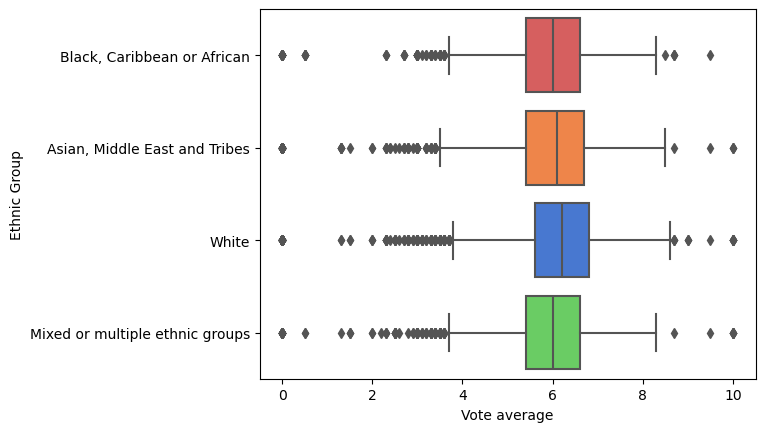

In [208]:
sns.boxplot(data=characters_movies, x="Vote average", y="Ethnic Group",palette=ethnic_group_palette,saturation=1)

In [209]:
for (x,y) in list(combinations(ethnic_groups,2)):
    p_value=ttest_ind(characters_movies[characters_movies['Ethnic Group']==x]['Vote average'],
                      characters_movies[characters_movies['Ethnic Group']==y]['Vote average'], equal_var=False, nan_policy='omit')[1]
    print("ttest p-value result between ", x," and ", y, ": ",  p_value)

ttest p-value result between  Black, Caribbean or African  and  Asian, Middle East and Tribes :  0.14288764073892107
ttest p-value result between  Black, Caribbean or African  and  White :  1.017730896086584e-16
ttest p-value result between  Black, Caribbean or African  and  Mixed or multiple ethnic groups :  0.3084607875732046
ttest p-value result between  Asian, Middle East and Tribes  and  White :  4.240152000581948e-12
ttest p-value result between  Asian, Middle East and Tribes  and  Mixed or multiple ethnic groups :  0.6263753447122696
ttest p-value result between  White  and  Mixed or multiple ethnic groups :  1.7061843078159882e-14


### <a id='toc1_3_2_'></a>[Diversity score (initial attempt)](#toc0_)

In [210]:
#Count the number of unique ethnicities in a movie cast 
diversity_per_movie = characters_movies.groupby('Wikipedia Movie ID')['Ethnicity'].apply(lambda x : (len(np.unique(x))/len(x))*100)
#Then for each year, find the mean number of unique ethnicities in the cast
diversity_per_movie = pd.DataFrame({'Wikipedia Movie ID': diversity_per_movie.index.values,'Unique ethnicity':diversity_per_movie.values })

characters_movies = characters_movies.merge(diversity_per_movie,how='left',on='Wikipedia Movie ID')

#Try another approch where we take the number of unique ethnicities

#Count the number of unique ethnicities in a movie cast 
number_diversity_per_movie = characters_movies.groupby('Wikipedia Movie ID')['Ethnicity'].apply(lambda x : (len(np.unique(x))))
#Then for each year, find the mean number of unique ethnicities in the cast
number_diversity_per_movie = pd.DataFrame({'Wikipedia Movie ID': number_diversity_per_movie.index.values,'Number unique ethnicity':number_diversity_per_movie.values })

characters_movies = characters_movies.merge(number_diversity_per_movie,how='left',on='Wikipedia Movie ID')

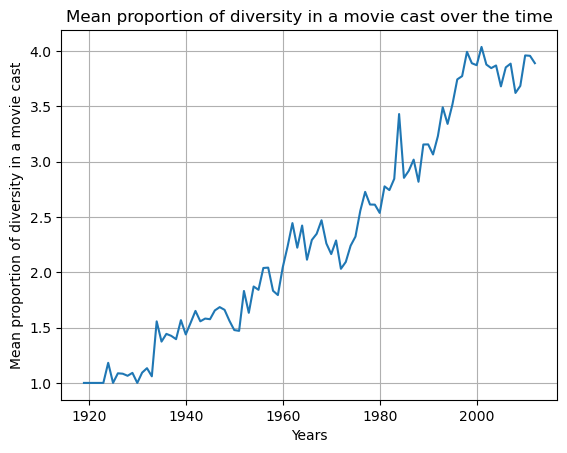

In [211]:
characters_movies.groupby('Movie release year')['Number unique ethnicity'].mean().plot()
plt.title('Mean proportion of diversity in a movie cast over the time')
plt.xlabel('Years')
plt.ylabel('Mean proportion of diversity in a movie cast')
plt.grid()

## <a id='toc1_4_'></a>[Machine learning analysis](#toc0_)

We would like to use machine learning tools to see if we can predict the success score of a movie based on characteristic such as diversity score

### <a id='toc1_4_1_'></a>[Causal analysis](#toc0_)

A causal analysis is usefull to know how to match movies based on their propensity score and which features we should keep or not.

#### <a id='toc1_4_1_1'></a>[Features selection and binarization](#toc0_)

To simplif our model, reduce the computational time and avoid overfitting, we should only select the features of the dataset that are relevant and meaningful for our analysis. Let's look at the data features and proced to the selection. <br>
Note that we are going to use the data set `main_character_genres` to represent each actors on the main genre they have played.

In [212]:
print(main_character_genres.columns)
main_character_genres.head(2)

Index(['Wikipedia Movie ID', 'Movie release date', 'Character name', 'Birth',
       'Gender', 'Ethnicity ID', 'Age at movie release',
       'Freebase character/actor map ID', 'Freebase character ID',
       'Freebase actor ID', 'Ethnicity', 'Ethnic Group', 'Movie name',
       'Movie language', 'Movie countries', 'Movie genres', 'Budget',
       'Plot summary', 'Vote average', 'Vote count', 'Box office revenue',
       'Movie runtime', 'Movie release year', 'Main character', 'genre'],
      dtype='object')


,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,...,Movie genres,Budget,Plot summary,Vote average,Vote count,Box office revenue,Movie runtime,Movie release year,Main character,genre
0,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,...,"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001,1,Thriller
1,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,...,"[Thriller, Science Fiction, Horror, Adventure,...",28000000,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001,1,Thriller


In [213]:
selected_features = ['Gender', 'Age at movie release', 'Movie release year','Ethnic Group','Movie language','Movie countries','genre',
                     'Budget','Vote average','Box office revenue','Movie runtime','Movie release year']
model = main_character_genres[selected_features]
model.head(3)

,Gender,Age at movie release,Movie release year,Ethnic Group,Movie language,Movie countries,genre,Budget,Vote average,Box office revenue,Movie runtime,Movie release year
0,M,32.0,2001,"Black, Caribbean or African",[English Language],[United States of America],Thriller,28000000,4.8,14010832.0,98.0,2001
1,F,52.0,2001,"Black, Caribbean or African",[English Language],[United States of America],Thriller,28000000,4.8,14010832.0,98.0,2001
2,M,42.0,2001,"Asian, Middle East and Tribes",[English Language],[United States of America],Thriller,28000000,4.8,14010832.0,98.0,2001


The variables in the columns `Movie language` and `Movie countries` could be binarize but this process will make the model hudge and with a lot of unrevelevant variables (for example an movie language in italian or in spanish won't drastically change its success). To solve this issue we should investigate more the dataset on these categories. <br>
Note that this time, we're analysis the original dataset `character_movies` as we don't want the movies with a lot of genre to be overrepresented.

In [214]:
print(f"Number of different languages in the dataset : {len(characters_movies['Movie language'].value_counts())}")
characters_movies['Movie language'].value_counts().head(10)

Number of different languages in the dataset : 1041


Movie language
[English Language]                      43689
[Hindi Language]                         6904
NaN                                      3354
[Tamil Language]                         1789
[English Language, Spanish Language]     1334
[French Language, English Language]      1008
[French Language]                         856
[Malayalam Language]                      839
[Telugu language]                         772
[Italian Language]                        718
Name: count, dtype: int64

In [215]:
print(f"Number of different languages in the dataset : {len(characters_movies['Movie countries'].value_counts())}")
characters_movies['Movie countries'].value_counts().head(10)

Number of different languages in the dataset : 1124


Movie countries
[United States of America]                    37330
[India]                                       12420
[United Kingdom]                               3599
[United States of America, United Kingdom]     2632
NaN                                            1318
[United States of America, Germany]            1188
[United States of America, Canada]             1114
[France]                                        824
[Canada]                                        605
[Italy]                                         584
Name: count, dtype: int64

We notice that movies are mostly distributed in English and also a bit in Hindi. Concerning the country production, the United State of Ameria and India are the main productors. 
For the model binarization, we can set a category to indicate if the movie is in english (True/False) and if it is in Hindi. We'll create corresponding categories for the movie country (USA or India).

We can now binarize the categorical columns of the dataset. These categories are `Gender`, `Ethnic group`, `Movie language`, `Movie countries` and `genre`. As a reminder, 0 corresponds to `False` whereas 1 correpsonds to `True`.

In [216]:
#Binarize the language category

#Let's notice that language is sometimes written in upper and lower case
model.loc[:,'English language'] = model['Movie language'].apply(lambda x: 1 if ('English Language' or 'English language') in x else 0)
model.loc[:,'Hindi language'] = model['Movie language'].apply(lambda x: 1 if ('Hindi Language' or 'Hindi language') in x else 0 )

#Binarize the country category
#Let's notice that language is sometimes written in upper and lower case
model.loc[:,'USA'] = model['Movie countries'].apply(lambda x: 1 if ('United States of America') in x else 0)
model.loc[:,'India'] = model['Movie countries'].apply(lambda x: 1 if ('India') in x else 0)

#Binarize the gender and the genre
model = pd.get_dummies(model, columns=['Gender','genre'], dtype=int)
#Remove the "genre_" prefix in the new columns
model.columns = model.columns.str.replace('genre_','')

#Drop all the categorical columns
model = model.drop(columns=['Ethnic Group','Movie language','Movie countries'])

C:\Users\ovola\AppData\Local\Temp\ipykernel_29372\185899683.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model.loc[:,'English language'] = model['Movie language'].apply(lambda x: 1 if ('English Language' or 'English language') in x else 0)
C:\Users\ovola\AppData\Local\Temp\ipykernel_29372\185899683.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model.loc[:,'Hindi language'] = model['Movie language'].apply(lambda x: 1 if ('Hindi Language' or 'Hindi language') in x else 0 )
C:\Users\ovola\AppData\

**I don't know how to remove the error messages :/**

In [217]:
model.head()

,Age at movie release,Movie release year,Budget,Vote average,Box office revenue,Movie runtime,Movie release year,English language,Hindi language,USA,...,Action,Action/Adventure,Comedy,Crime Fiction,Drama,Indie,Romance Film,Romantic drama,Thriller,World cinema
0,32.0,2001,28000000,4.8,14010832.0,98.0,2001,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,52.0,2001,28000000,4.8,14010832.0,98.0,2001,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,42.0,2001,28000000,4.8,14010832.0,98.0,2001,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,30.0,2001,16000000,7.3,29381649.0,123.0,2001,1,0,1,...,0,0,0,1,0,0,0,0,0,0
5,22.0,2001,16000000,7.3,29381649.0,123.0,2001,1,0,1,...,0,0,0,1,0,0,0,0,0,0


Now that the features of the dataset have been binarized, we can verify the corroletion between them via a pairplot.

c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before ope

c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cate

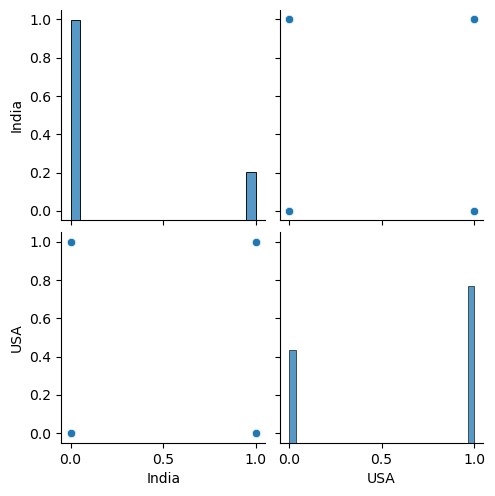

In [218]:
sns.pairplot(model[['India','USA']])

**We can't plot the all dataset at once, we have to do subplot, if we want everything**

### <a id='toc1_4_2_'></a>[Linear regression models](#toc0_)

#### <a id='toc1_4_2_1'></a>[Proportion of male and female](#toc0_)

In [219]:
# Caluculate the proportion of Female and Male
proportion_gender = characters_movies.groupby('Wikipedia Movie ID')['Gender'].value_counts(normalize=True) * 100
proportion_gender = proportion_gender.unstack()
proportion_gender['Proportion Male'] = proportion_gender['M']
proportion_gender['Proportion Female'] = proportion_gender['F']
proportion_gender = proportion_gender[['Proportion Male', 'Proportion Female']]
proportion_gender = proportion_gender.fillna(0)

characters_movies = characters_movies.merge(proportion_gender,how='left',on='Wikipedia Movie ID')
characters_movies.head()

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,...,Vote average,Vote count,Box office revenue,Movie runtime,Movie release year,Main character,Unique ethnicity,Number unique ethnicity,Proportion Male,Proportion Female
0,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,...,4.8,299.0,14010832.0,98.0,2001,1,66.666667,2,66.666667,33.333333
1,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,...,4.8,299.0,14010832.0,98.0,2001,1,66.666667,2,66.666667,33.333333
2,975900,2001-08-24,Tres,1959-03-09,M,/m/064b9n,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,...,4.8,299.0,14010832.0,98.0,2001,0,66.666667,2,66.666667,33.333333
3,3196793,2000-02-16,NaN,1937-11-10,M,/m/0x67,62.0,/m/0lr37dy,NaN,/m/01lntp,...,NaN,NaN,NaN,95.0,2000,0,100.000000,1,100.000000,0.000000
4,156558,2001-06-27,Yvette,1970-09-11,F,/m/0x67,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,...,7.3,57.0,29381649.0,123.0,2001,1,8.333333,1,50.000000,50.000000


#### <a id='toc1_4_2_2'></a>[Success Score](#toc0_)

In this section we will delve into the creation of ML algorithm that can predict the success score based on the Rating and revenue. 

First attemp of the success score

In [222]:
# Create a "success score" with ML. Analyste teh success score Y with the following features:
# ['Gender', 'Age at movie release' , 'Ethnic Group',
# 'Budget', 'Vote average', 'Box office revenue', 'Movie release year', 'Unique ethnicity'] 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Let's first create a new dataset with the features we want to use
success_score = characters_movies.copy()[['Budget', 'Vote average', 'Box office revenue', \
                                                'Movie release year', 'Number unique ethnicity', 'Proportion Male']]
# drop the NaN values
success_score = success_score.dropna()
# Drop values with Budget 0 or Box office revenue 0
success_score['Budget'] = success_score['Budget'].astype(float)
success_score = success_score[success_score['Budget'] != 0]
success_score = success_score[success_score['Box office revenue'] < 5000]
success_score = success_score[success_score['Box office revenue'] != 0]

success_score['Success Score'] = success_score['Box office revenue']/success_score['Budget']*success_score['Vote average']


# Normalize all the with std and mean, use the scaler to transform the data

scaler = StandardScaler()
# Use scaler to standardize the data
# Standardize the data using the scaler
scaled_data = scaler.fit_transform(success_score[['Budget', 'Vote average', 'Box office revenue', 'Movie release year', 'Number unique ethnicity', 'Proportion Male']])

# Create a new dataframe with the standardized data
scaled_success_score = pd.DataFrame(scaled_data, columns=['Budget', 'Vote average', 'Box office revenue', 'Movie release year', 'Number unique ethnicity', 'Proportion Male'])

# Add the 'Success Score' column to the scaled dataframe
scaled_success_score['Success Score'] = success_score['Success Score'].reset_index(drop=True)

# Print the scaled success score dataframe
scaled_success_score.head()

# Separate the data into X and Y
X = success_score[success_score.columns[:-1]]
Y = success_score['Success Score']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


Group by movies  --- not sure we really want to use this method. For now I only runned the code above.

In [221]:
""" 

# Create a "success score" with ML. Analyste teh success score Y with the following features:
# ['Gender', 'Age at movie release' , 'Ethnic Group',
# 'Budget', 'Vote average', 'Box office revenue', 'Movie release year', 'Unique ethnicity'] 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Let's first create a new dataset with the features we want to use
success_score_movie = characters_movies.copy().groupby('Wikipedia Movie ID')[['Budget', 'Vote average', 'Box office revenue', \
                                                'Movie release year', 'Number unique ethnicity', 'Proportion Male']].median()
# drop the NaN values
success_score_movie = success_score_movie.dropna()
# Drop values with Budget 0 or Box office revenue 0
success_score_movie['Budget'] = success_score_movie['Budget'].astype(float)
success_score_movie = success_score_movie[success_score_movie['Budget'] != 0]
success_score_movie = success_score_movie[success_score_movie['Box office revenue'] != 0]
success_score_movie 
success_score_movie ['Success Score'] = success_score_movie['Box office revenue']/success_score_movie['Budget']*success_score_movie['Vote average']


# Normalize all the with std and mean, use the scaler to transform the data

scaler = StandardScaler()
# Use scaler to standardize the data
# Standardize the data using the scaler
scaled_data_movie = scaler.fit_transform(success_score_movie[['Budget', 'Vote average', 'Box office revenue', 'Movie release year', 'Number unique ethnicity', 'Proportion Male']])

# Create a new dataframe with the standardized data
scaled_success_score_movie = pd.DataFrame(scaled_data_movie, columns=['Budget', 'Vote average', 'Box office revenue', 'Movie release year', 'Number unique ethnicity', 'Proportion Male'])

# Add the 'Success Score' column to the scaled dataframe
scaled_success_score_movie['Success Score'] = success_score_movie['Success Score'].reset_index(drop=True)

# Print the scaled success score dataframe
scaled_success_score_movie.head()
scaled_success_score_movie = scaled_success_score_movie[scaled_success_score_movie['Success Score']<100]

# Separate the data into X and Y
X = scaled_success_score_movie[scaled_success_score_movie.columns[:-1]]
Y = scaled_success_score_movie['Success Score']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
"""


c:\Users\ovola\anaconda3\envs\ada\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


TypeError: agg function failed [how->median,dtype->object]

Probably better version where we use the box office revenue as Y

In [223]:
# Create a "success score" with ML. Analyste teh success score Y with the following features:
# ['Gender', 'Age at movie release' , 'Ethnic Group',
# 'Budget', 'Vote average', 'Box office revenue', 'Movie release year', 'Unique ethnicity'] 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Let's first create a new dataset with the features we want to use
model_reg = characters_movies.copy()[['Budget', 'Vote average', 'Box office revenue', \
                                                'Movie release year', 'Number unique ethnicity', 'Proportion Male']]
# drop the NaN values
model_reg = model_reg.dropna()
# Drop values with Budget 0 or Box office revenue 0
model_reg['Budget'] = model_reg['Budget'].astype(float)
model_reg = model_reg[model_reg['Budget'] != 0]
model_reg = model_reg[model_reg['Box office revenue'] != 0]


scaler = StandardScaler()
# Use scaler to standardize the data
# Standardize the data using the scaler
scaled_data = scaler.fit_transform(model_reg[['Budget', 'Vote average', 'Box office revenue', 'Movie release year', 'Number unique ethnicity', 'Proportion Male']])

# Create a new dataframe with the standardized data
scaled_success_score = pd.DataFrame(scaled_data, columns=['Budget', 'Vote average', 'Box office revenue', 'Movie release year', 'Number unique ethnicity', 'Proportion Male'])

# Add the 'Success Score' column to the scaled dataframe
#scaled_success_score['Success Score'] = success_score['Success Score'].reset_index(drop=True)

# Print the scaled success score dataframe
scaled_success_score.head()

# Separate the data into X and Y
#X = success_score[success_score.columns[:-1]]
#Y = success_score['Success Score']
X = model_reg.drop(columns='Box office revenue',axis=1)
Y = model_reg['Box office revenue']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


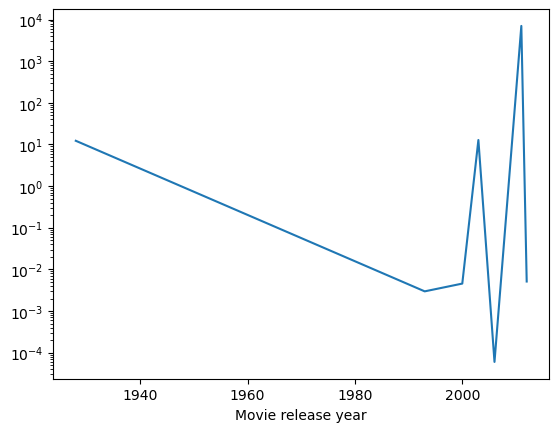

In [ ]:
success_scores_year = success_score.groupby('Movie release year')['Success Score'].mean()
success_scores_year.plot()
plt.yscale('log')

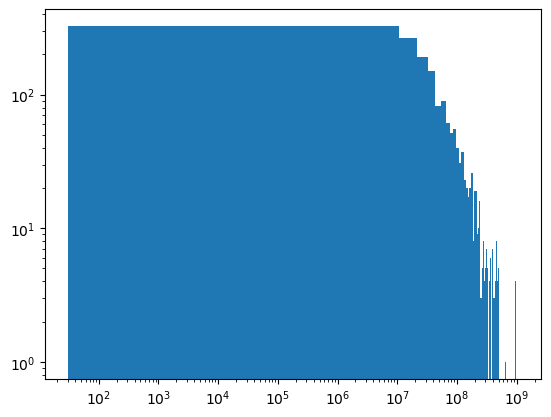

In [224]:
plt.hist(Y_test, bins=100,log=True)
plt.xscale('log')

R2 score: 0.5603983215269233


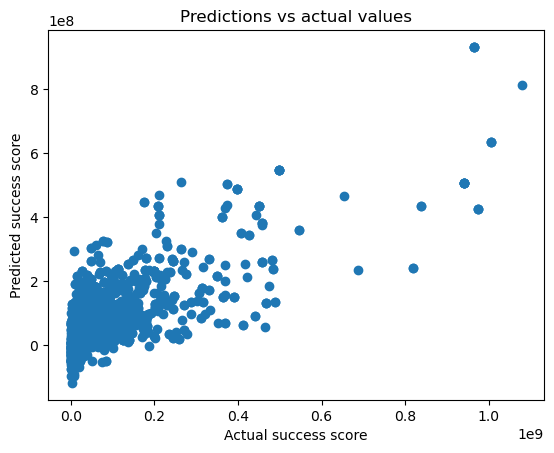

In [225]:
# Make predictions on the test set. Make pipeline to include scalar
# Create a pipeline with scaling and linear regression
pipeline = Pipeline([
    ('scaler', scaler),
    ('model', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, Y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)
predictions
# Compute the R2 score and print it
r2 = pipeline.score(X_test, Y_test)
print(f"R2 score: {r2}")

# Plot the predictions vs the actual values
plt.scatter(Y_test, predictions)
plt.xlabel('Actual success score')
plt.ylabel('Predicted success score')
plt.title('Predictions vs actual values')

plt.show()

>lr 0.593 (0.009)
>lasso 0.593 (0.009)
>ridge 0.593 (0.009)
>en 0.530 (0.007)
>svr -0.131 (0.015)
>rf 0.985 (0.002)


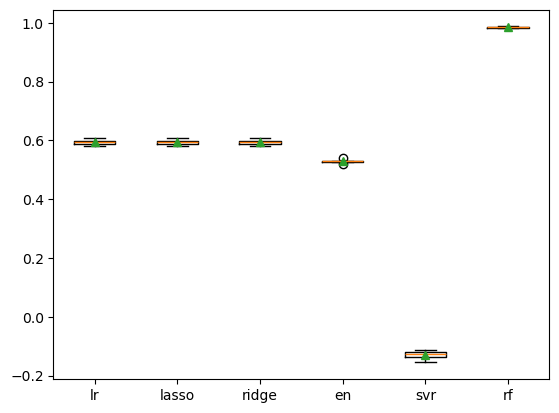

In [226]:
# train with other models for regression:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


models = dict()
models['lr'] = LinearRegression()
models['lasso'] = Lasso()
models['ridge'] = Ridge()
models['en'] = ElasticNet()
models['svr'] = SVR()
models['rf'] = RandomForestRegressor()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    # create a pipeline with scaling and the model
    pipeline = make_pipeline(scaler, model)
    

    # Evaluate the model using cross-validation
    scores = cross_val_score(pipeline, X_train, Y_train, cv=5)

    
    # store the results
    results.append(scores)
    names.append(name)
    
    # summarize progress along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

R2 score: 0.9942277378497765


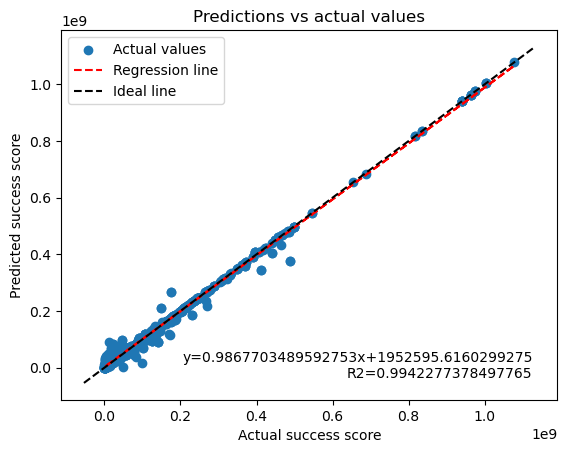

In [227]:
# Choose the best model
best_model = models['rf']
pipeline = make_pipeline(scaler, best_model)
    
pipeline.fit(X_train, Y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)
predictions
# Compute the R2 score and print it
r2 = pipeline.score(X_test, Y_test)
print(f"R2 score: {r2}")

# Plot the predictions vs the actual values
plt.scatter(Y_test, predictions)
# Add regression line
z = np.polyfit(Y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"r--")
# Add line equation and r2
plt.text(0.95, 0.05, f"y={z[0]}x+{z[1]}\nR2={r2}", fontsize=10, ha='right', va='bottom', transform=plt.gca().transAxes)
# Now draw ideal line of slope 1
x = np.linspace(*plt.xlim())
plt.plot(x, x, color='black', linestyle='--')

plt.legend(['Actual values','Regression line', 'Ideal line'])
plt.xlabel('Actual success score')
plt.ylabel('Predicted success score')
plt.title('Predictions vs actual values')
plt.show()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


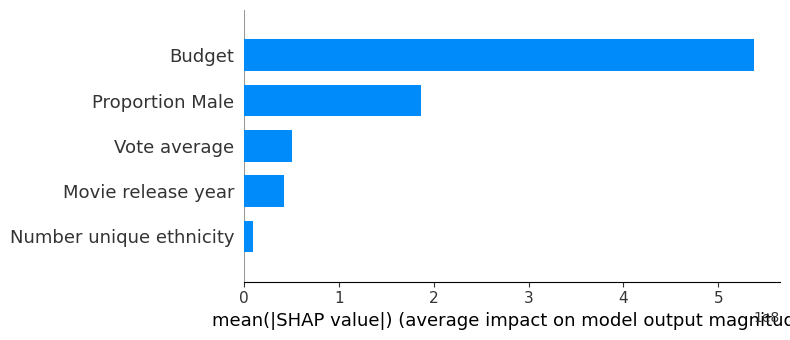

In [228]:
# Python
import shap

# Create a TreeExplainer object
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_train)

# Plot the SHAP values
shap.summary_plot(shap_values, X_train, plot_type="bar")